# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [128]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier, XGBRegressor

In [227]:
# read the csv file
data = pd.read_csv('EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [228]:
# present the first 5 rows of data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [229]:
# determine the Dtypes, number of rows and columns, and number of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations:**



*   There are 25480 entries
*   There are 25480 non-null values and 0 missing values
*   There are 9 objects, 2 int64s, and 1 float64



In [230]:
# check for duplicates
data.duplicated().sum()

0

**Observations:**



*   There are 0 duplicates

In [231]:
# check for null values
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations:**



*   isna.sum() confirms that there are no missing values

In [232]:
# check the descriptive statistics of the int and float variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


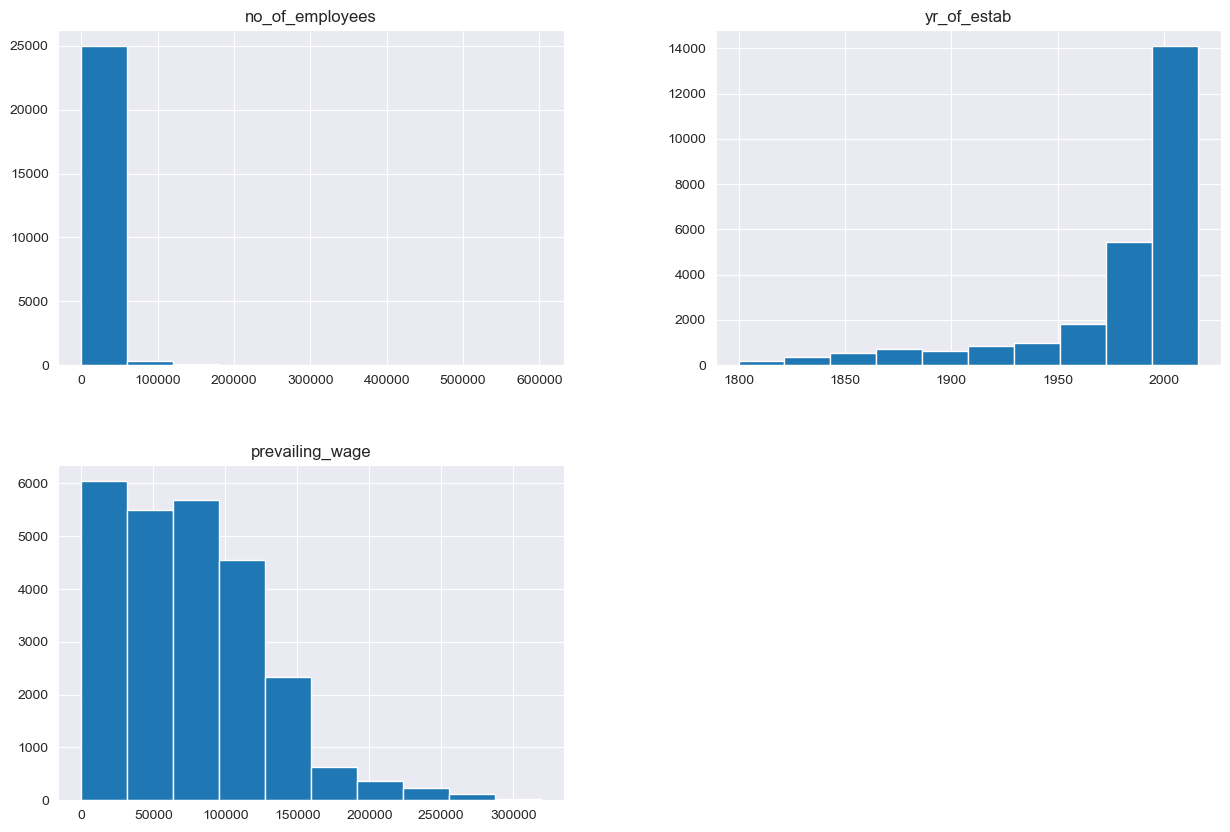

In [233]:
# run a histogram for each of the int variables
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

**Observations:**



*   Most of the employers own businesses with fewer than 10,000 employees
*   There is a positive correlation between the year established and the number of companies established
*   There is a negative trend with the count of companies in the data set decreasing as wage increases

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# function from MLS
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function from MLS
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = str(p.get_height()) + " (" + str("{:.1f}%".format(
                100 * p.get_height() / total
            )) + ")"  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
# function from MLS
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
# function from MLS
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [234]:
# iterate through columns and perform appropriate MLS function
def iterate_and_plot_stacked(data, target):
  for column in data.columns:
    if column != target and data[column].dtype == 'object':
      if column != 'case_id':
        print ("\033[1m",target, " vs ", column,"\033[0m")
        stacked_barplot(data, column, target)

In [235]:
# iterate through columns and perform appropriate MLS function
def iterate_and_plot_distr(data, target):
  for column in data.columns:
    if column != target and (data[column].dtype == 'int64' or df[column].dtype == 'float64'):
      if column != 'case_id':
        print ("\033[1m",target, " vs ", column,"\033[0m")
        distribution_plot_wrt_target(data, column, target)

In [236]:
# create a copy so that the source data is not harmed
df = data.copy()

# Univariate Analysis

### case_id

**Observations:**


*   These are unique IDs and therefore there is no meaningful analysis that can be performed on this variable



### continent

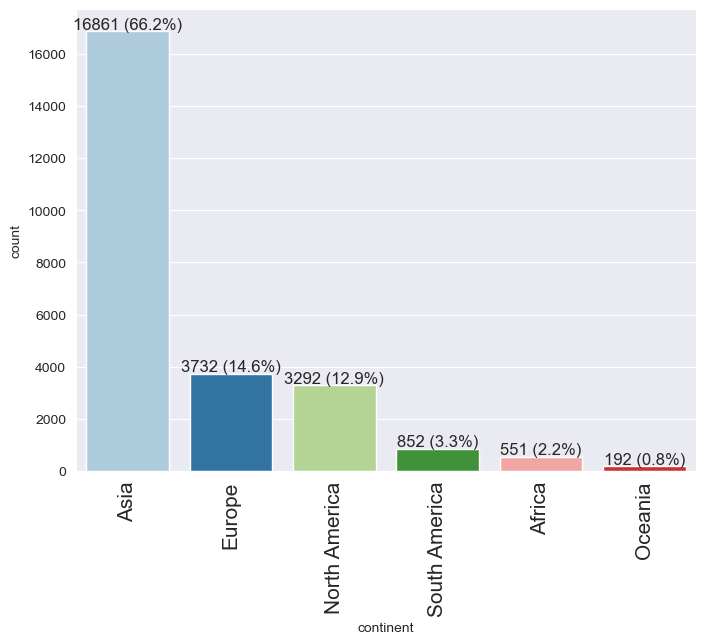

In [17]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'continent', perc = True)

**Observations:**



*   Most employees come from Asia (16861, 66.2%)
*   Fewest employees come from Oceania (192, 0.8%)



### education_of_employee

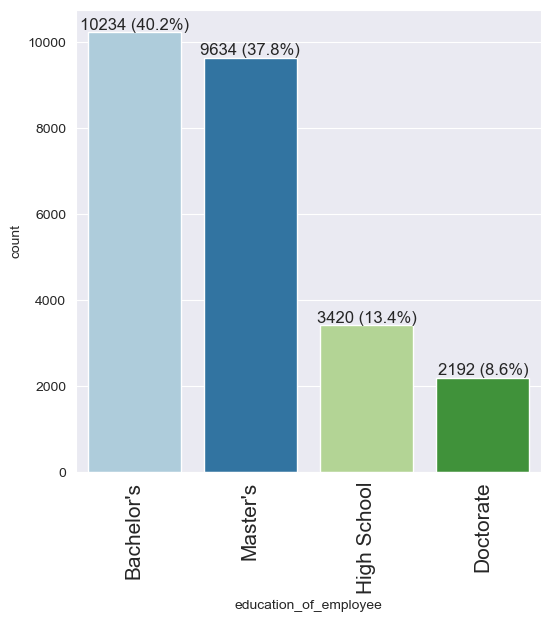

In [18]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'education_of_employee', perc = True)

**Observations:**



*   Most employees have a Bachelor's degree (10234, 40.2%), followed by a Master's (9634, 37.8%), and then a High School degree (3420, 13.4%)
*   The fewest employees had a Doctorate degree (2192, 8.6%)



### has_job_experience

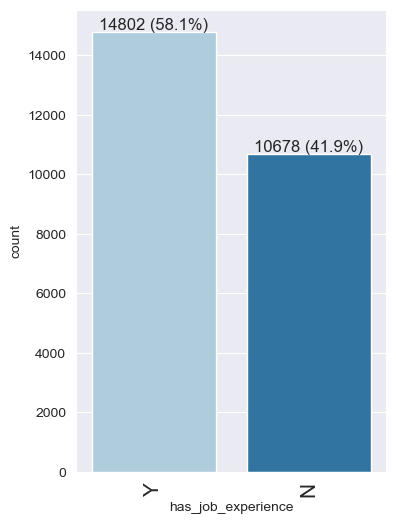

In [19]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'has_job_experience', perc = True)

**Obervations:**



*   Most employees have job experience (14802, 58.1%)



### requires_job_training

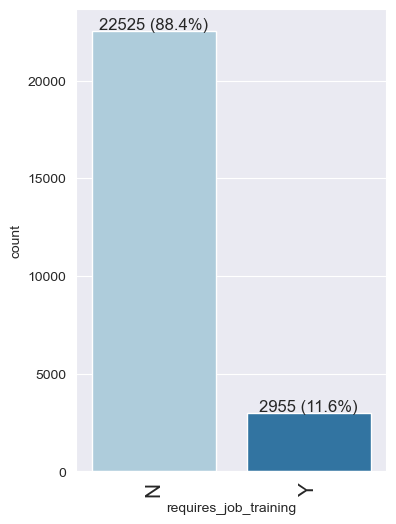

In [20]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'requires_job_training', perc = True)

**Observations:**


*   Most jobs do not require any job training (22525, 88.4%)



### no_of_employees

183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: no_of_employees, Length: 7105, dtype: int64

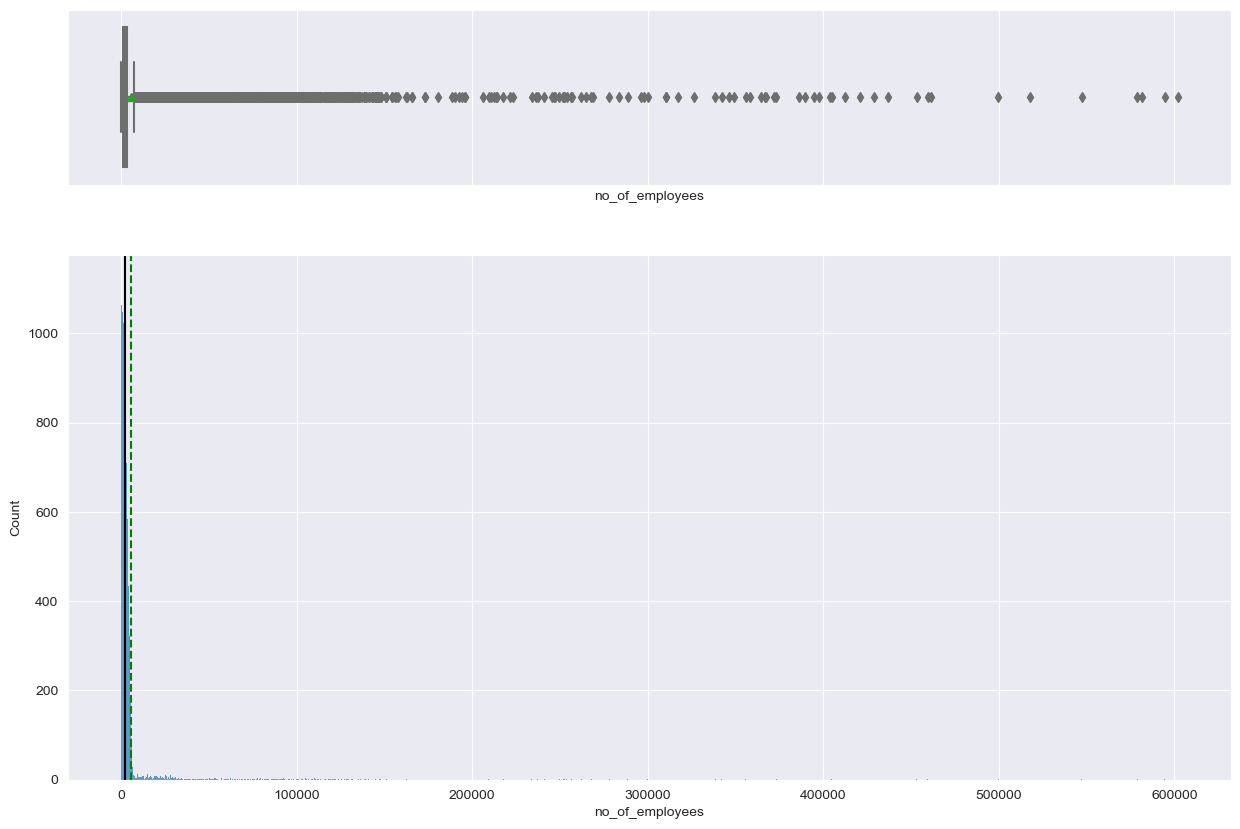

In [21]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df,"no_of_employees")
df.no_of_employees.value_counts()

In [237]:
# check the descriptive statistics for no_of_employees variable
df.no_of_employees.describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

**Observations:**


*   There is a very large value range in no_of_employees, stretching from -26 to 602069
*   A further look into this variable will be necessary when cleaning up the data as it should be impossible for a company to have a negative number of employees
*   The data set has a mean number of employees of 5667
*   75% of companies have equal to or fewer than 3504 employees





### yr_of_estab

1998    1134
2005    1051
2001    1017
2007     994
1999     870
        ... 
1842       6
1846       4
1822       4
1810       3
1824       2
Name: yr_of_estab, Length: 199, dtype: int64

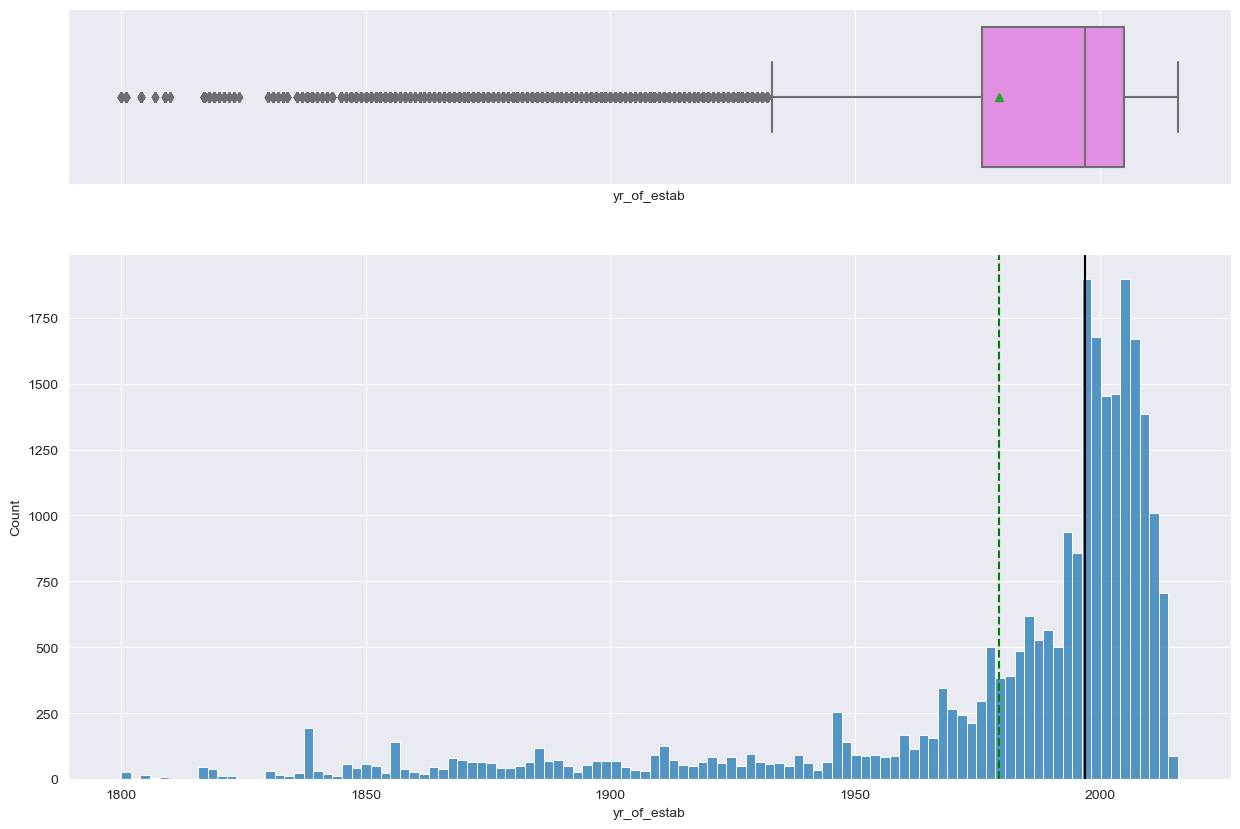

In [238]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df,"yr_of_estab")
df.yr_of_estab.value_counts()

In [239]:
# check the descriptive statistics for the yr_of_estab variable
df.yr_of_estab.describe()

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

**Observation:**


*   The mean year established is 1979
*   75% of the companies were established after 1979
*   The oldest company was established in 1800 and the newest, 2016







### region_of_employment

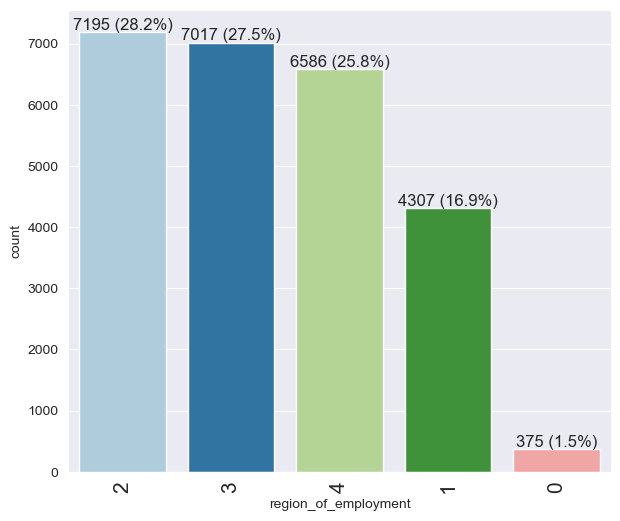

In [292]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'region_of_employment', perc = True)

**Observation:**



*   There was a similar distribution between Northeast, South, and West regions (7195 (28.2%), 7017 (27.5%), 6586 (25.8%), respectively)
*   There was a pretty steep drop off to Midwest (4307, 16.9%) and another to Island (375, 1.5%)



### prevailing_wage

82560.2800     2
122.6500       2
60948.1500     2
64357.5800     2
108.1200       2
              ..
25713.9800     1
101656.6400    1
65665.5500     1
50.8813        1
70876.9100     1
Name: prevailing_wage, Length: 25454, dtype: int64

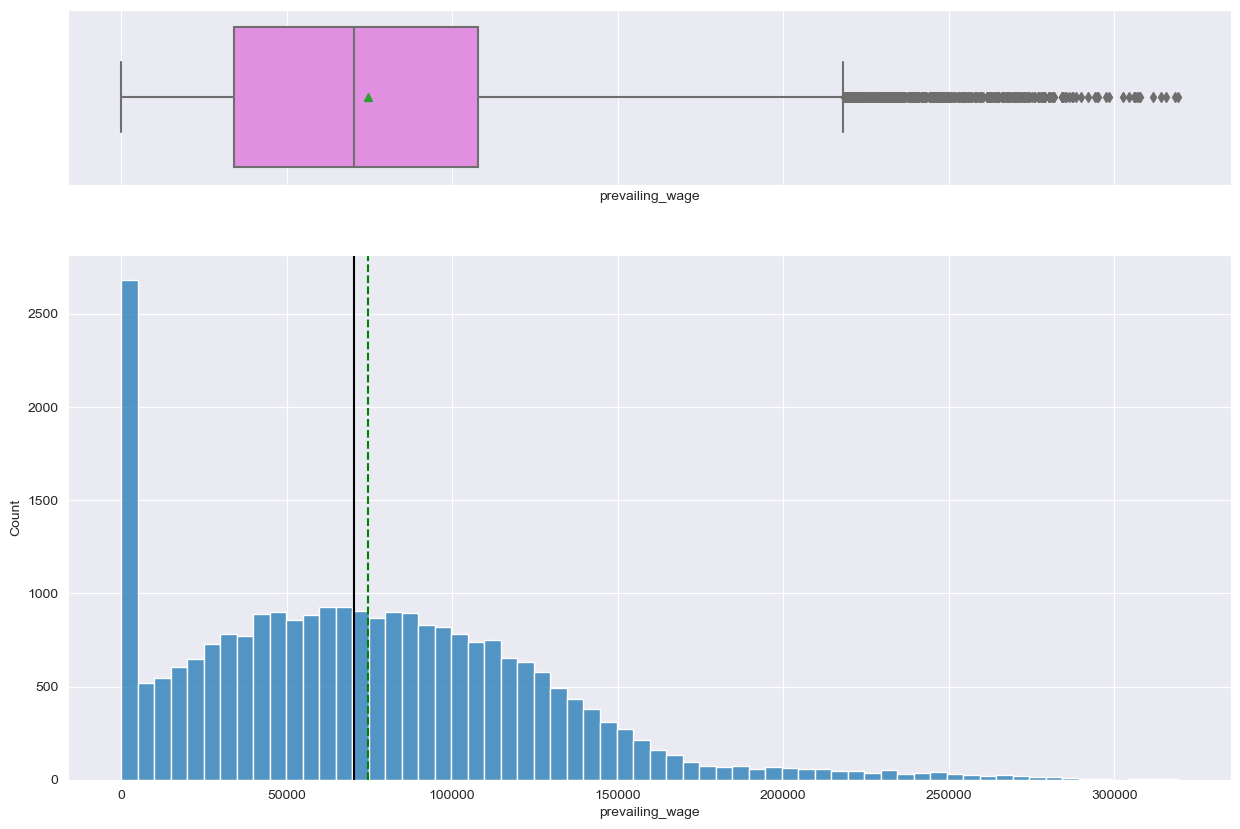

In [26]:
# perform a univariate analysis of the variable and check the value counts
histogram_boxplot(df,"prevailing_wage")
df.prevailing_wage.value_counts()

In [240]:
# check the descriptive statistices for the prevailing_wage variable
df.prevailing_wage.describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

**Observations:**

*   The mean wage is 75445.81, with a min wage of 2.14 and a max wage of 319210.27
*   There may be an issue with some of the wages close to the min as those are not typically legal working wages





### unit_of_wage

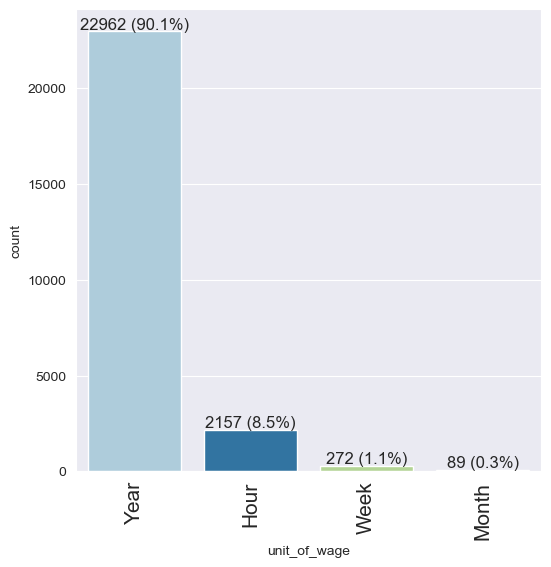

In [28]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'unit_of_wage', perc = True)

**Observations:**



*   Most employees get paid by the year (22962, 90.1%)
*   The fewest get paid by the month (89, 0.3%)



### full_time_position

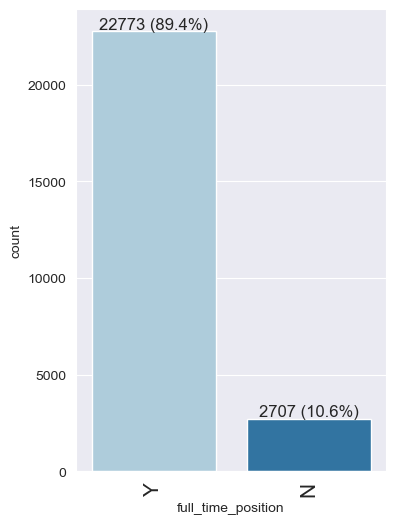

In [29]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'full_time_position', perc = True)

**Observations:**



*   Most jobs are full time (22773, 89.4%)
*   The rest are not full time (2707, 10.6%)



### case_status

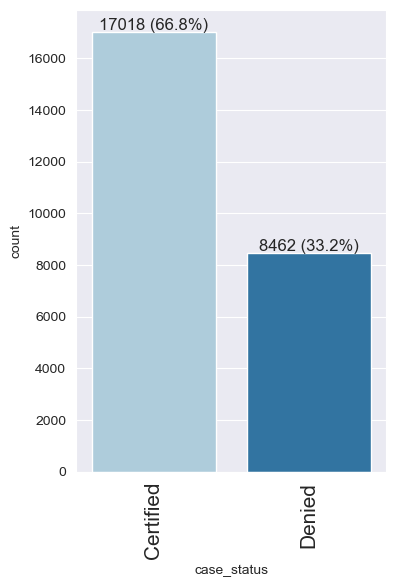

In [30]:
# perform a univariate analysis of the variable
labeled_barplot( df, 'case_status', perc = True)

**Observations:**



*   Most cases are certified (17018, 66.8%)
*   The rest are denied (8462, 33.2%)



# Bivariate Analysis

**Correlation Check**

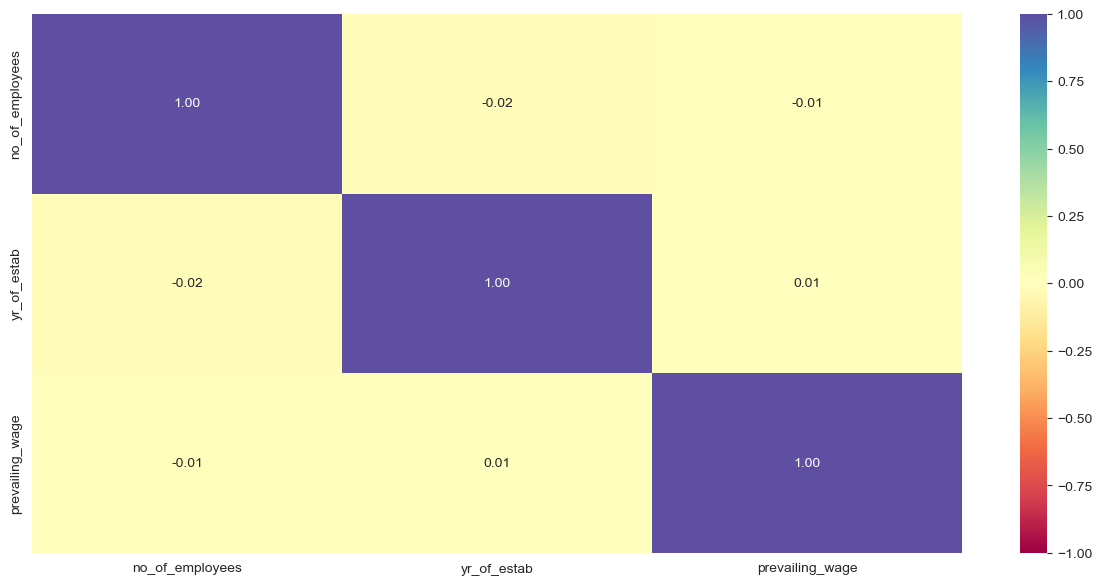

In [31]:
# run a heatmap to check correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**



*   All int64 items have neither positive nor negative correlation associated with their relationships with each other



#### case_status vs others

 case_status  vs  no_of_employees 


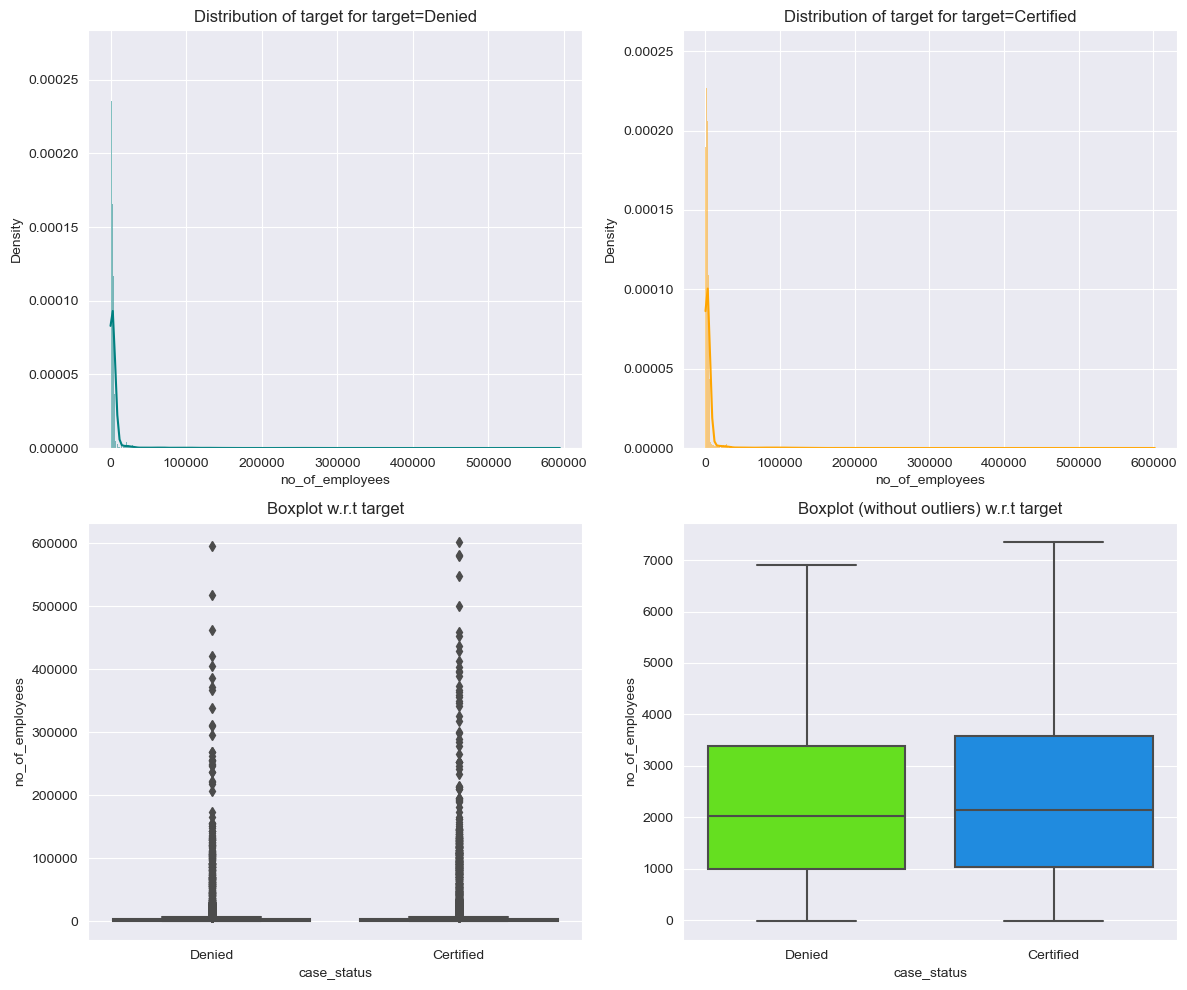

 case_status  vs  yr_of_estab 


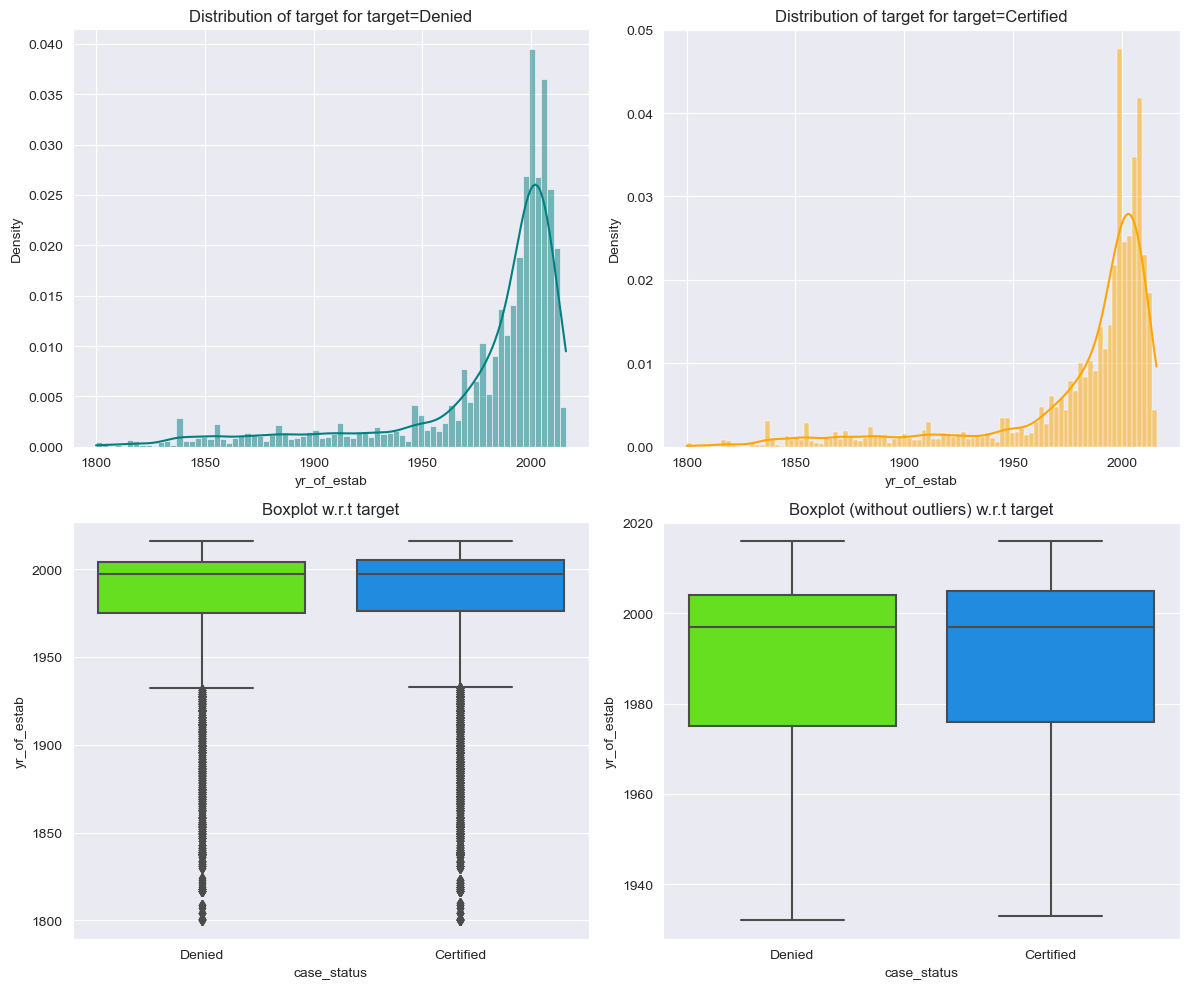

 case_status  vs  prevailing_wage 


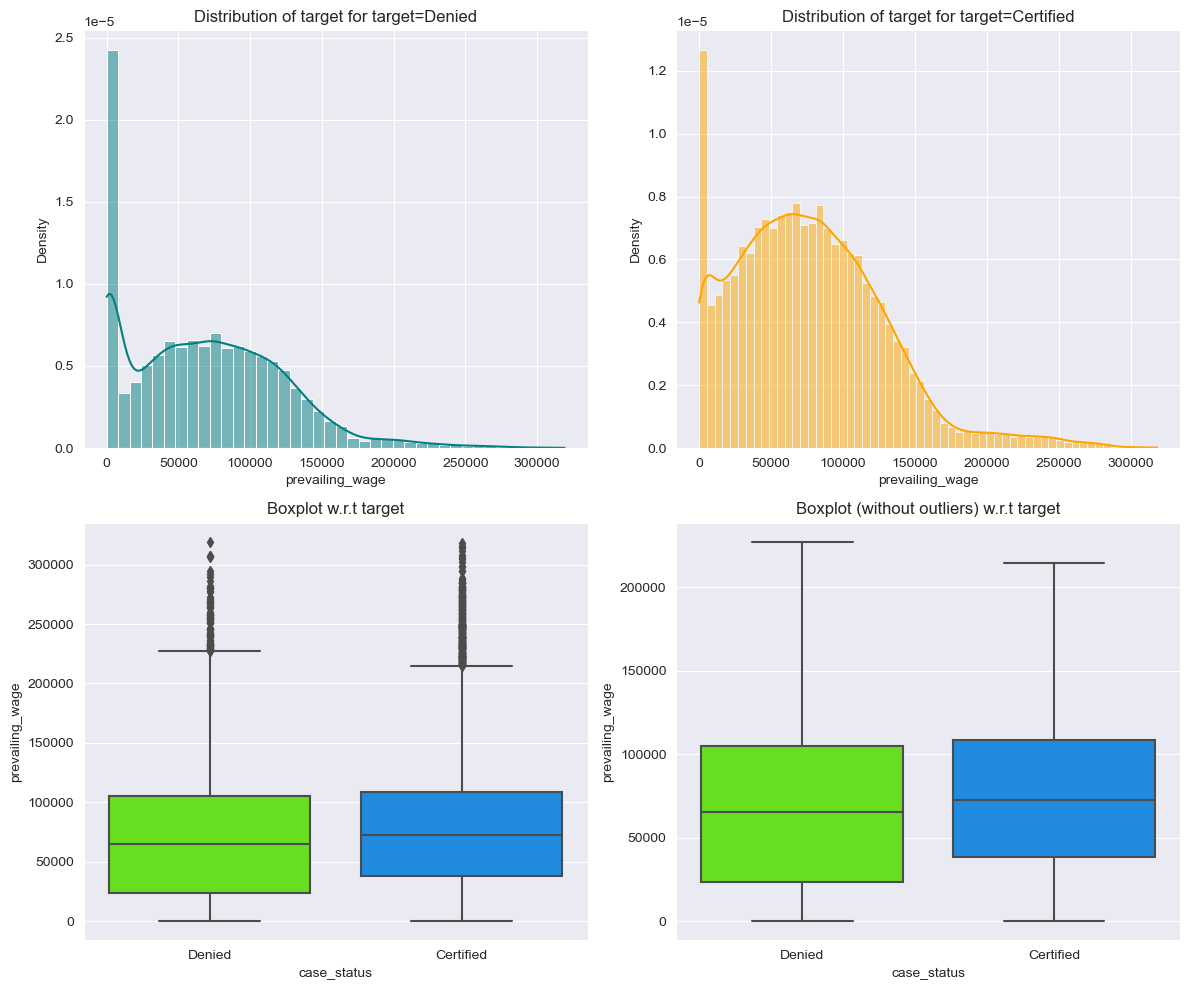

In [241]:
# run a bivariate analysis on all int columns vs case_status
iterate_and_plot_distr(df, 'case_status')

**Observations:**


* **no_of_employees**
 *   no_of_employees did not seem to have much effect on case_status

* **yr_of_estab**
 *   yr_of_estab did not seem to have much effect on case_status

* **prevailing_wage**
 *   prevailing_wage did not seem to have much effect on case_status



 case_status  vs  continent 
case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


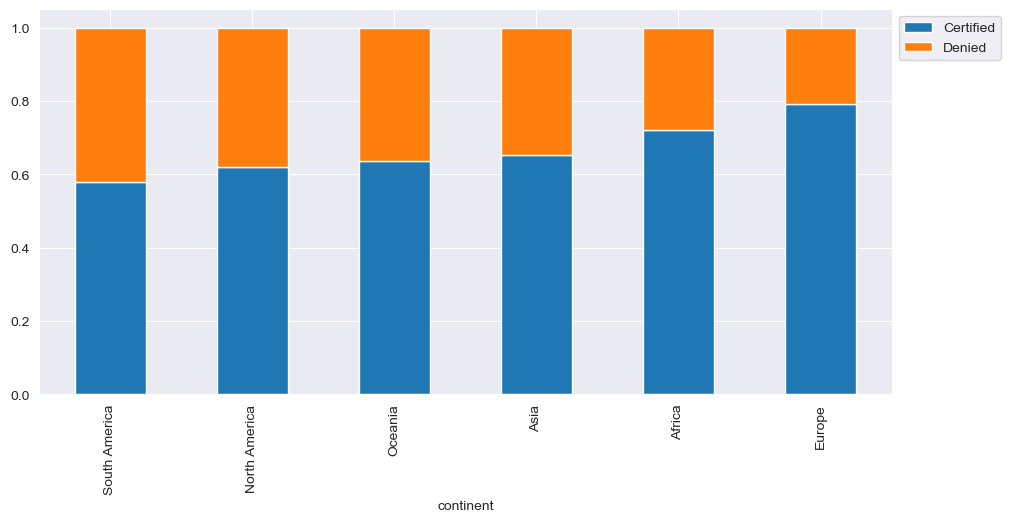

 case_status  vs  education_of_employee 
case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


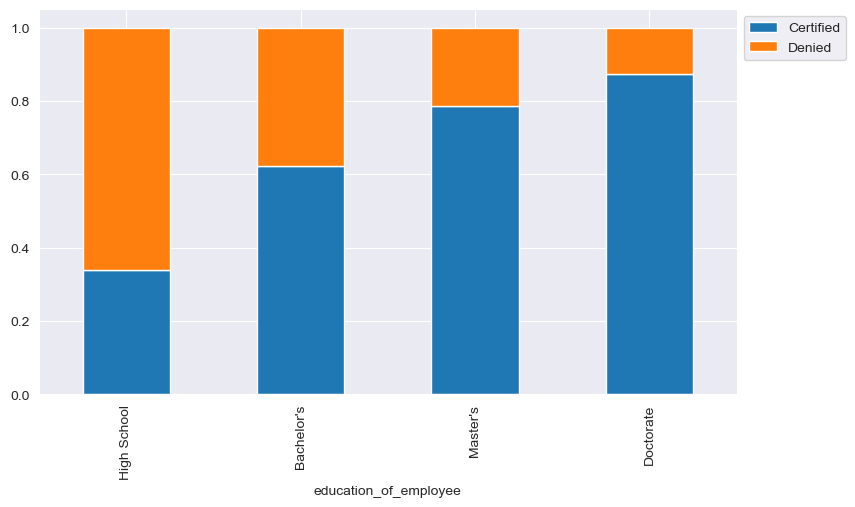

 case_status  vs  has_job_experience 
case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


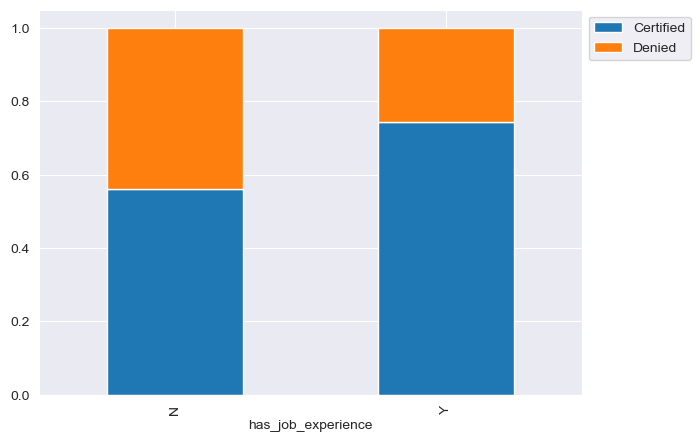

 case_status  vs  requires_job_training 
case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


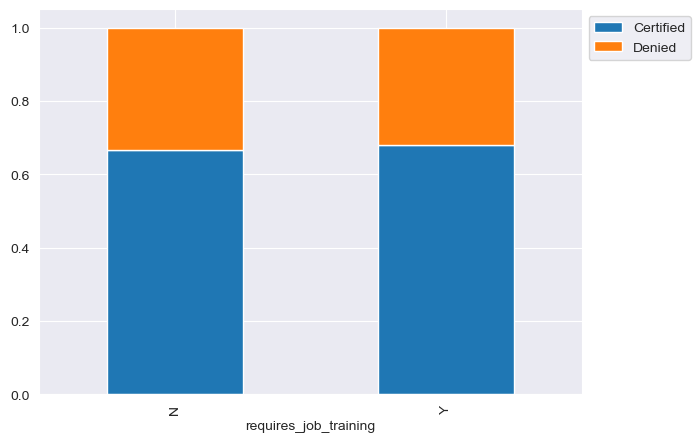

 case_status  vs  region_of_employment 
case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


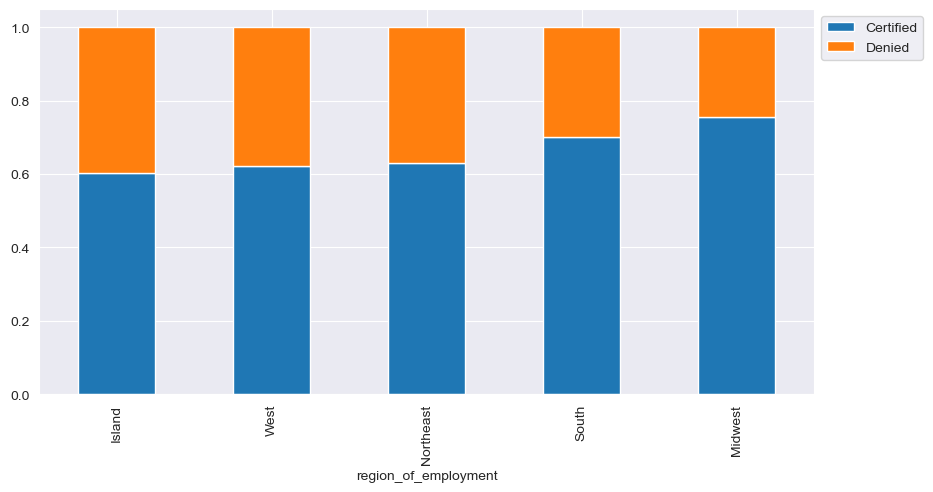

 case_status  vs  unit_of_wage 
case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


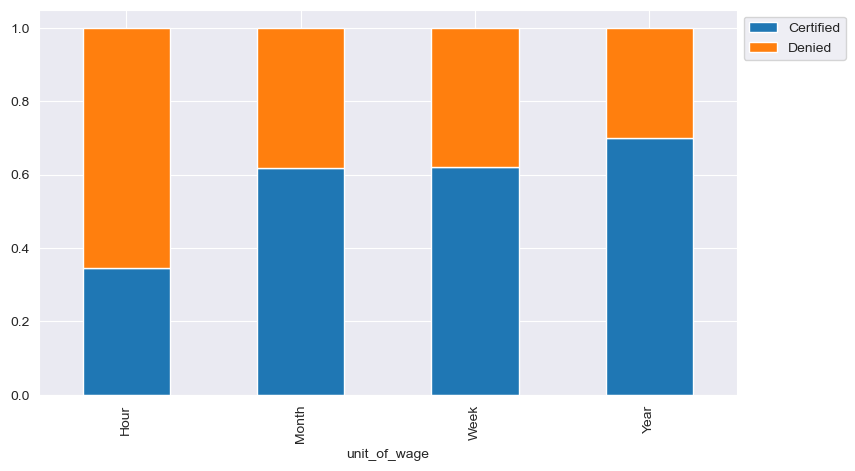

 case_status  vs  full_time_position 
case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


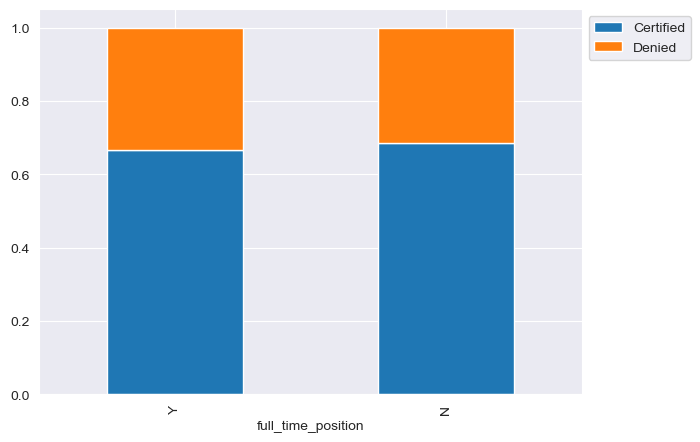

In [242]:
# run a bivariate analysis on all categorical variables vs case_status
iterate_and_plot_stacked(df, 'case_status')

**Observations:**

**case_status vs:**

*   **continent**
 *   Europeans have the highest chance to be certified
 * South Americans have the highest chance to be denied

*   **education_of_employee**
 *   There is a pretty clear positive trend in level of education and case_status. The higher the level of education, the more likely the employee was to get the job

*   **has_job_experience**
 *   The data shows that there is a higher likelihood of getting employed with job experience than without it

*   **requires_job_training**
 *   There is very little difference between requiring job training and not; however, there is a slightly higher percentage of certified employees with those who apply to jobs that require job training

*   **region_of_employment**
 *   Island, West, and Northeast regions all have very similar percentages, with South having a slightly higher percentage, and Midwest having the highest percentage to be certified

*   **unit_of_wage**
 *   Interestingly, jobs that had hourly wages as opposed to month, week, or year had a drastically smaller chance to get certified
 * Month and week have very similar percentages and the year unit of wage has the highest percentage to be certified

*   **full_time_position**
 *   Whether or not the postion is full time did not seem to effect the outcome of case status. Not full time has a very slightly higher certified rate, but it is insignificant











**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


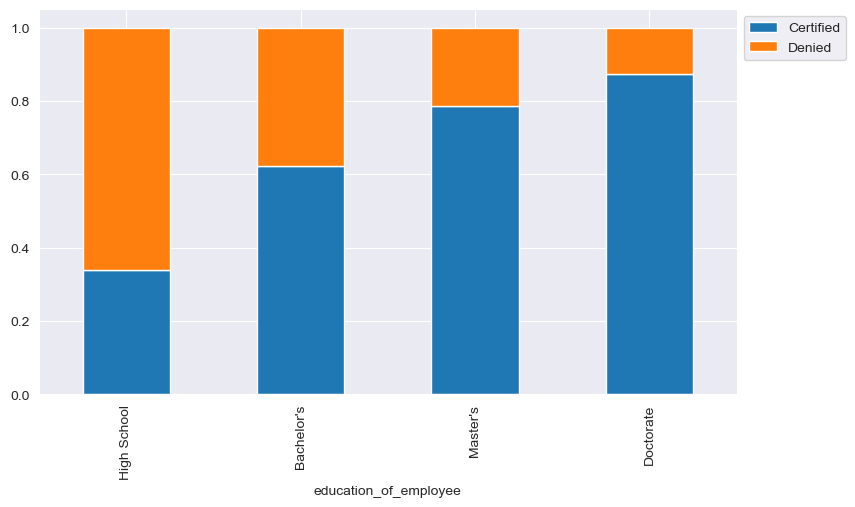

In [243]:
# run a bivariate analysis on education_of_employee vs case_status
stacked_barplot(df, 'education_of_employee', 'case_status')

**Observations:**


*   Absolutely. As can be seen above, there is a significantly higher chance to get certified between someone with a High School education and a Bachelor's degree. After Bachelor's, there are smaller, but significant increases in rate of certification from Bachelor's to Master's and Master's to Doctorate



#### 2. How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


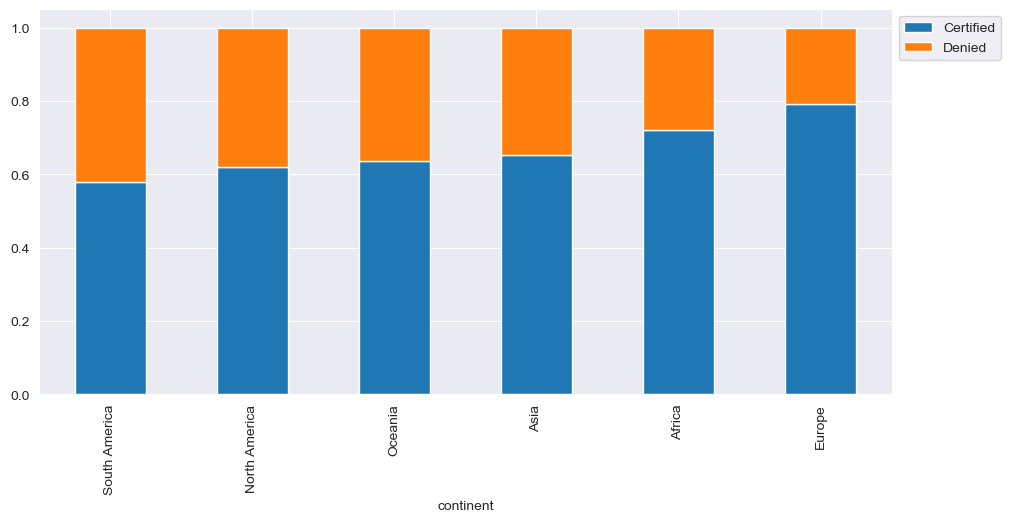

In [244]:
# run a bivariate analysis on continent vs case_status
stacked_barplot(df, 'continent', 'case_status')

**Observations:**


*   Europeans have the highest chance to be certified, followed by Africans, Asians, Oceanians, North Americans, and then South Americans



#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


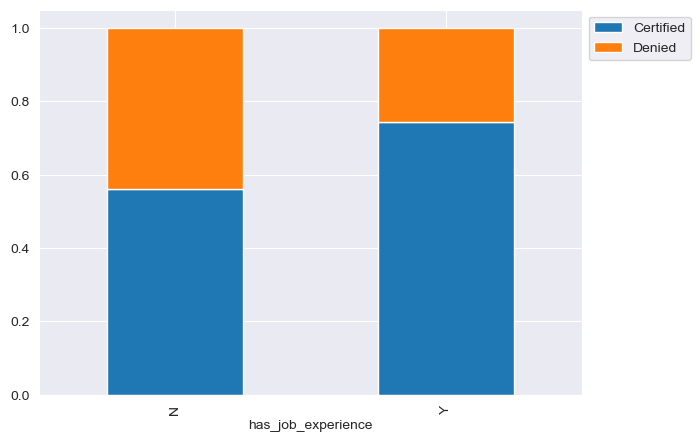

In [245]:
# run a bivariate analysis on has_job_experience vs case_status
stacked_barplot(df, 'has_job_experience', 'case_status')

**Observations:**


*   Yes, those who had job experience before applying were far more likley to be certified than those who had no job experience



#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


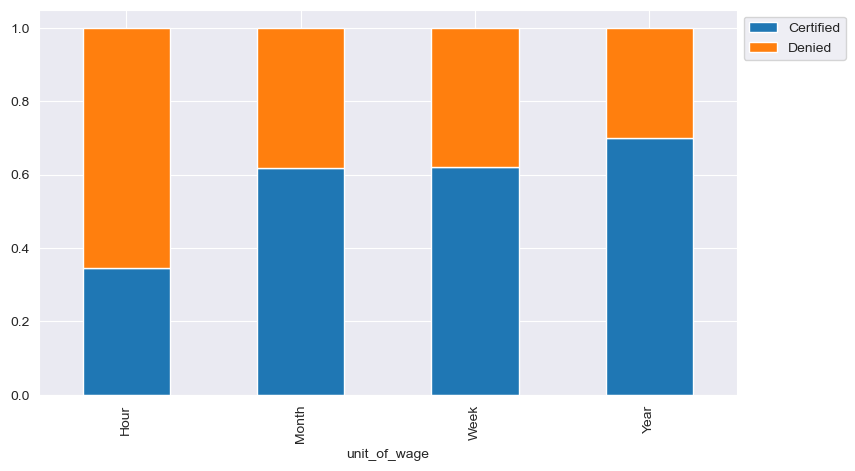

In [246]:
# run a bivariate analysis on unit_of_wage vs case_status
stacked_barplot(df, 'unit_of_wage', 'case_status')

**Observations:**


*   The pay unit that is most likely to secure the certification is by Year
*  The pay unit that is least likely to secure the certification is by Hour



#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

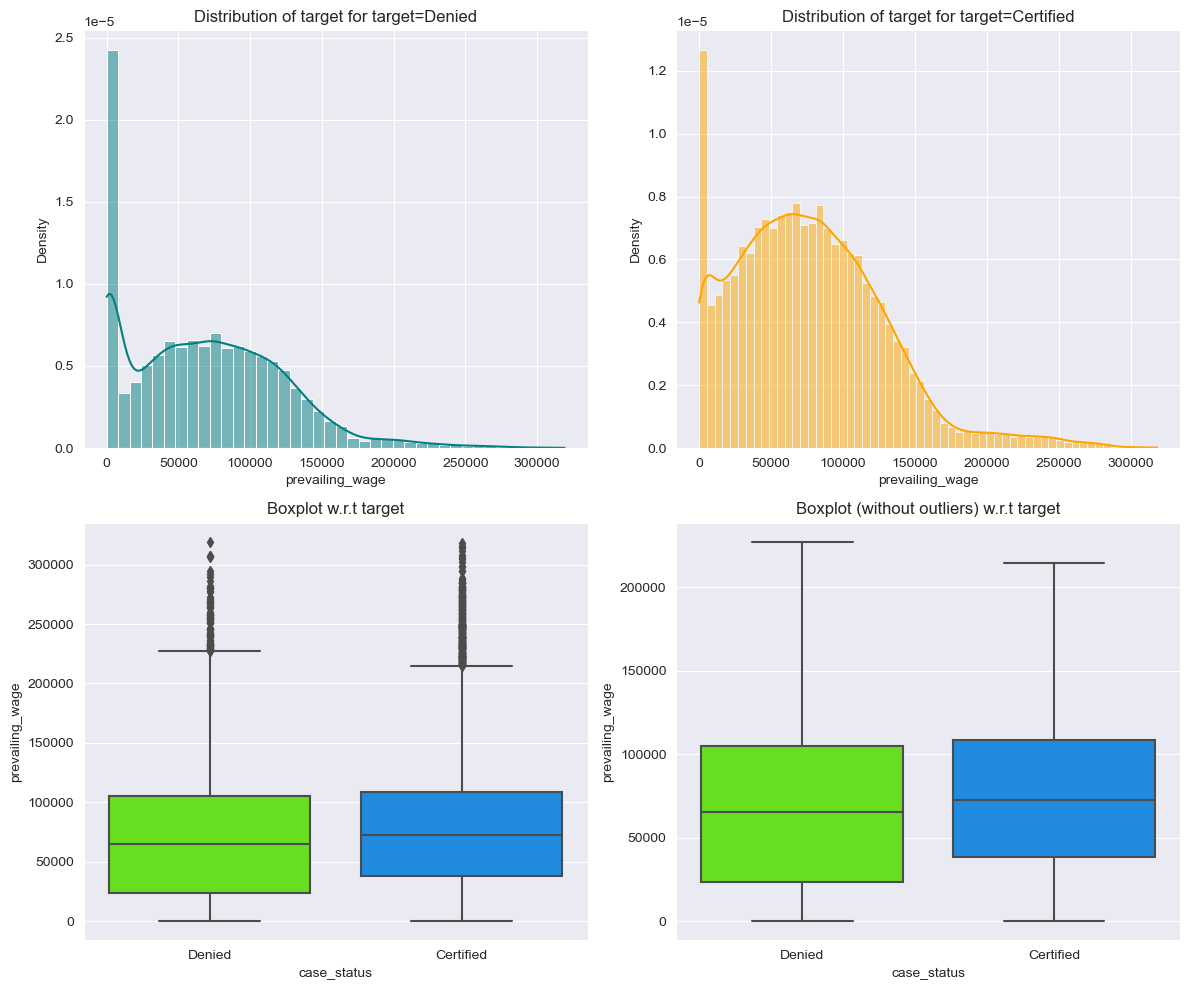

In [247]:
# run a bivariate analysis on prevailing_wage vs case_status
distribution_plot_wrt_target(df, 'prevailing_wage', 'case_status')

**Observations:**


*  There is a far higher number of denied visas with privailing wages much closer to 0 and becomes much more similar as the privailing wage increases



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value Treatment

In [248]:
# confirm missing value sums
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations:**


*   No missing values so there is no missing value treatment needed



#### Feature Engineering

In [249]:
# drop id variable
df = df.drop('case_id', axis = 1)

In [250]:
# function from MLS
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


In [251]:
# function based on MLS- turns category dtypes into int dtypes
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'category': # Only apply for columns with categorical strings
        df[feature] = df[feature].cat.codes# Replace strings with an integer
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
5,1,3,1,0,2339,2012,3,78252.1400,3,1,0
6,1,0,0,0,4985,1994,3,53635.3900,3,1,0
7,3,0,1,0,3035,1924,4,418.2298,0,1,1
8,1,0,0,0,4810,2012,1,74362.1900,3,1,0
9,2,1,1,0,2251,1995,3,67514.7600,3,1,0


In [252]:
# print out value counts for the following variables
print(df.continent.value_counts())
print(df.education_of_employee.value_counts())
print(df.has_job_experience.value_counts())
print(df.requires_job_training.value_counts())
print(df.region_of_employment.value_counts())
print(df.unit_of_wage.value_counts())
print(df.full_time_position.value_counts())
print(df.case_status.value_counts())

1    16861
2     3732
3     3292
5      852
0      551
4      192
Name: continent, dtype: int64
0    10234
3     9634
2     3420
1     2192
Name: education_of_employee, dtype: int64
1    14802
0    10678
Name: has_job_experience, dtype: int64
0    22525
1     2955
Name: requires_job_training, dtype: int64
2    7195
3    7017
4    6586
1    4307
0     375
Name: region_of_employment, dtype: int64
3    22962
0     2157
2      272
1       89
Name: unit_of_wage, dtype: int64
1    22773
0     2707
Name: full_time_position, dtype: int64
0    17018
1     8462
Name: case_status, dtype: int64


In [253]:
# create new dataframe
replaceStruct = {
                "continent":     {"Asia": 1, "Europe": 2 ,"North America": 3 ,"South America": 4, "Africa": 5, "Oceania": 6},
                "education_of_employee": {"High School": 1, "Bachelor's":2 , "Master's": 3, "Doctorate": 4},
                 "has_job_experience": {"Y": 1, "N":2},
                 "requires_job_training": {"Y": 1, "N":2},
                "region_of_employment": {"Northeast": 1, "South": 2, "West": 3, "Midwest": 4, "Island": 5},
                "unit_of_wage":  {"Year": 1, "Month": 2, "Week": 3, "Hour": 4 },
                "full_time_position": {"Y": 1, "N": 2},
                "case_status": {"Certified": 0, "Denied": 1}
}

In [254]:
# show the first 10 rows of new dataframe
df = df.replace(replaceStruct)
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
5,1,3,1,0,2339,2012,3,78252.1400,3,1,0
6,1,0,0,0,4985,1994,3,53635.3900,3,1,0
7,3,0,1,0,3035,1924,4,418.2298,0,1,1
8,1,0,0,0,4810,2012,1,74362.1900,3,1,0
9,2,1,1,0,2251,1995,3,67514.7600,3,1,0


In [255]:
# check dtypes for all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  int8   
 1   education_of_employee  25480 non-null  int8   
 2   has_job_experience     25480 non-null  int8   
 3   requires_job_training  25480 non-null  int8   
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  int8   
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  int8   
 9   full_time_position     25480 non-null  int8   
 10  case_status            25480 non-null  int8   
dtypes: float64(1), int64(2), int8(8)
memory usage: 796.4 KB


#### Outlier Detection and Treatment

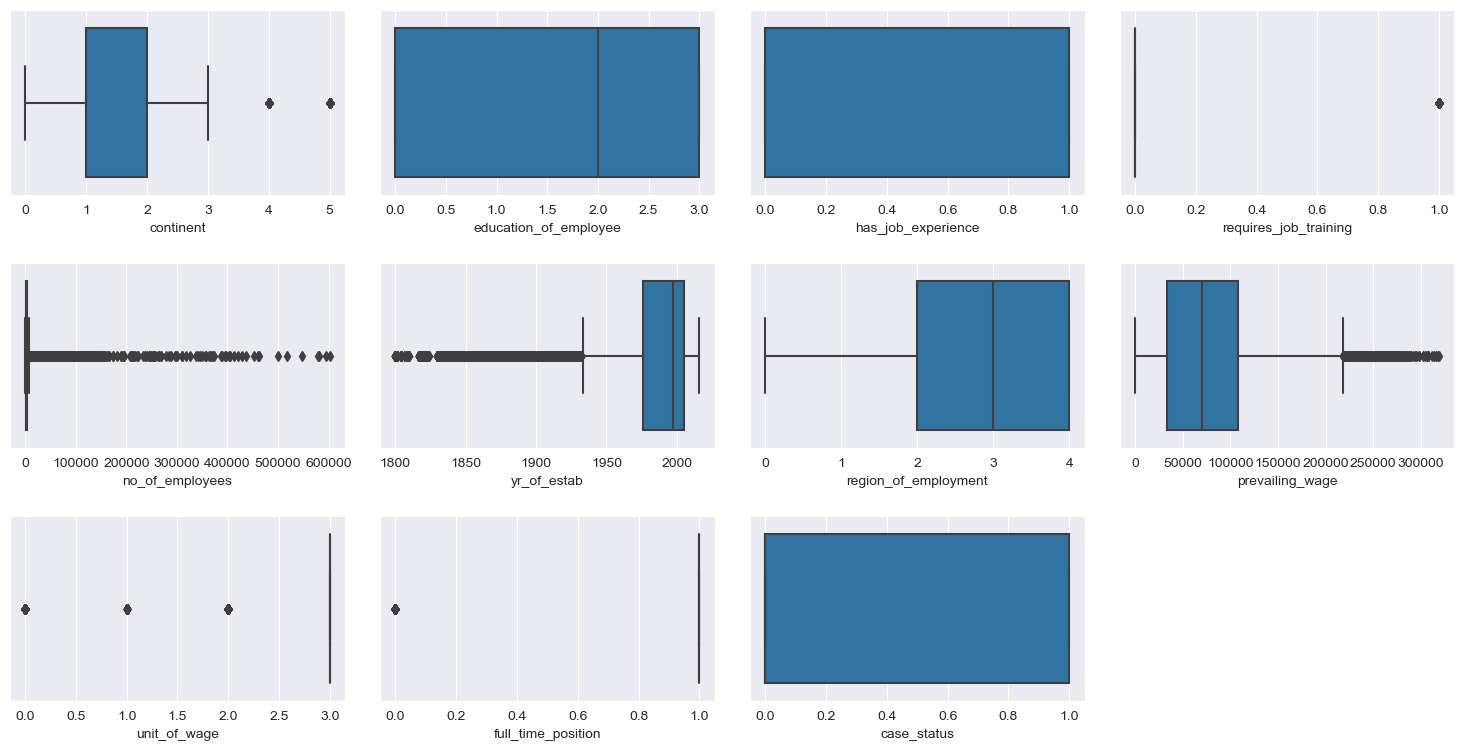

In [47]:
# outlier detection using boxplot from the MLS
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observations:**


*   **no_of_employees**
 *   There are so many outliers and such a consistent range that I would not be comfortable changing or removing any of them



*   **yr_of_estab**
 *   These are all reasonable years that companies may have been established. There are no future years or any years so far from others that it would seem unreasonable



*   **prevailing_wage**
 *   These are all reasonable salaries for jobs. I would not change any of these outliers







#### Preparing Data For Modeling

Let's take a look at no_of_employees

In [256]:
# check descriptive statistics for no_of_employees
df.no_of_employees.describe()

count     25480.000000
mean       5667.043210
std       22877.928848
min         -26.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [257]:
# filter dataframe for companies with less than 0 employees
df_filtered = df[df['no_of_employees']<0]

In [258]:
# check the value counts of filtered dataframe
df_filtered.no_of_employees.value_counts()

-11    9
-14    8
-26    7
-25    5
-17    4
Name: no_of_employees, dtype: int64

In [259]:
# remove negative values by using their absolute value
df['no_of_employees'] = df['no_of_employees'].abs()

In [260]:
# recheck the descriptive statistics
df.no_of_employees.describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

**Observations:**


*   I believe that it is likely that these negative values are mistakes because having a negative number of employees does not seem possible or realistic. So, I have taken the absolute value of every value in the no_of_employees series so that any negative number will be the positive value of itself





## EDA

- It is a good idea to explore the data once again after manipulating it.

183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      1
40224     1
Name: no_of_employees, Length: 7105, dtype: int64

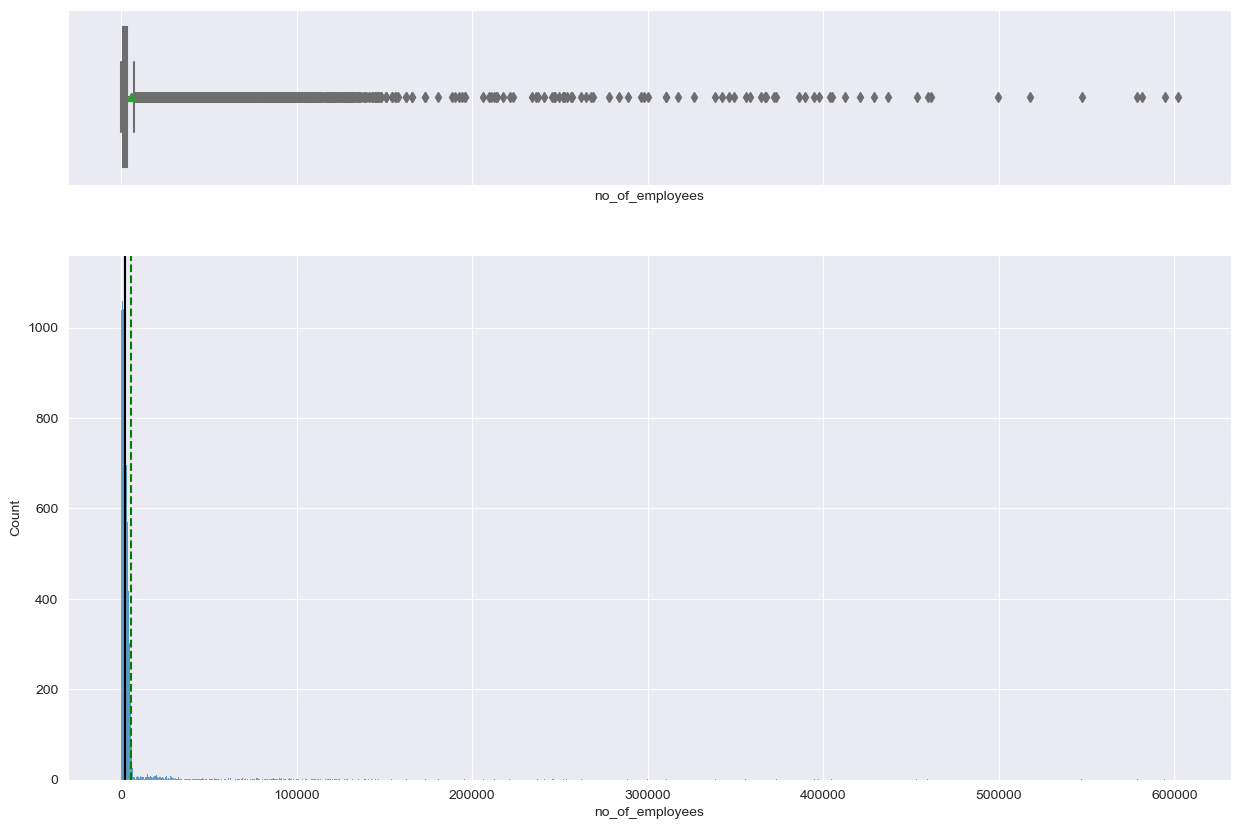

In [261]:
# check for changes in EDA for no_of_employees
histogram_boxplot(df,"no_of_employees")
df.no_of_employees.value_counts()

**Observations:**



*   The only changes to the dataset were to this series. After performing another univariate analysis on this variable, the values seem a lot more realistic



## Building Models

In [262]:
# create X and Y variables
X = df.drop("case_status" , axis=1)
y = df["case_status"]

In [263]:
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [57]:
## Function to create confusion matrix from MLS
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Denied","Actual - Certified"]],
                  columns = [i for i in ['Predicted - Denied','Predicted - Certified']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
##  Function from MLS
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

### Decision Tree Classifier

In [59]:
#base_estimator for bagging classifier is a decision tree by default
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [60]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.6584249084249084
Recall on training set :  1.0
Recall on test set :  0.4974399369830642
Precision on training set :  1.0
Precision on test set :  0.48614318706697457


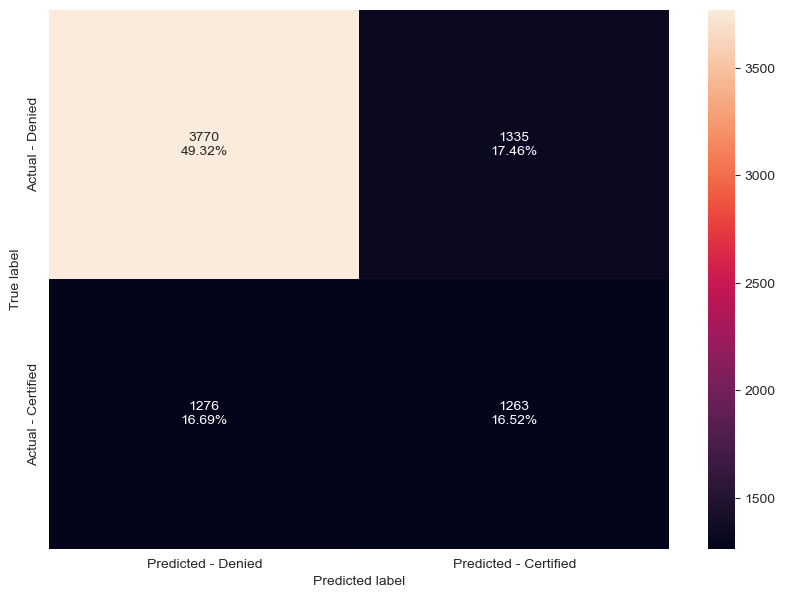

In [264]:
# make a confustion matrix
make_confusion_matrix(dtree,y_test)

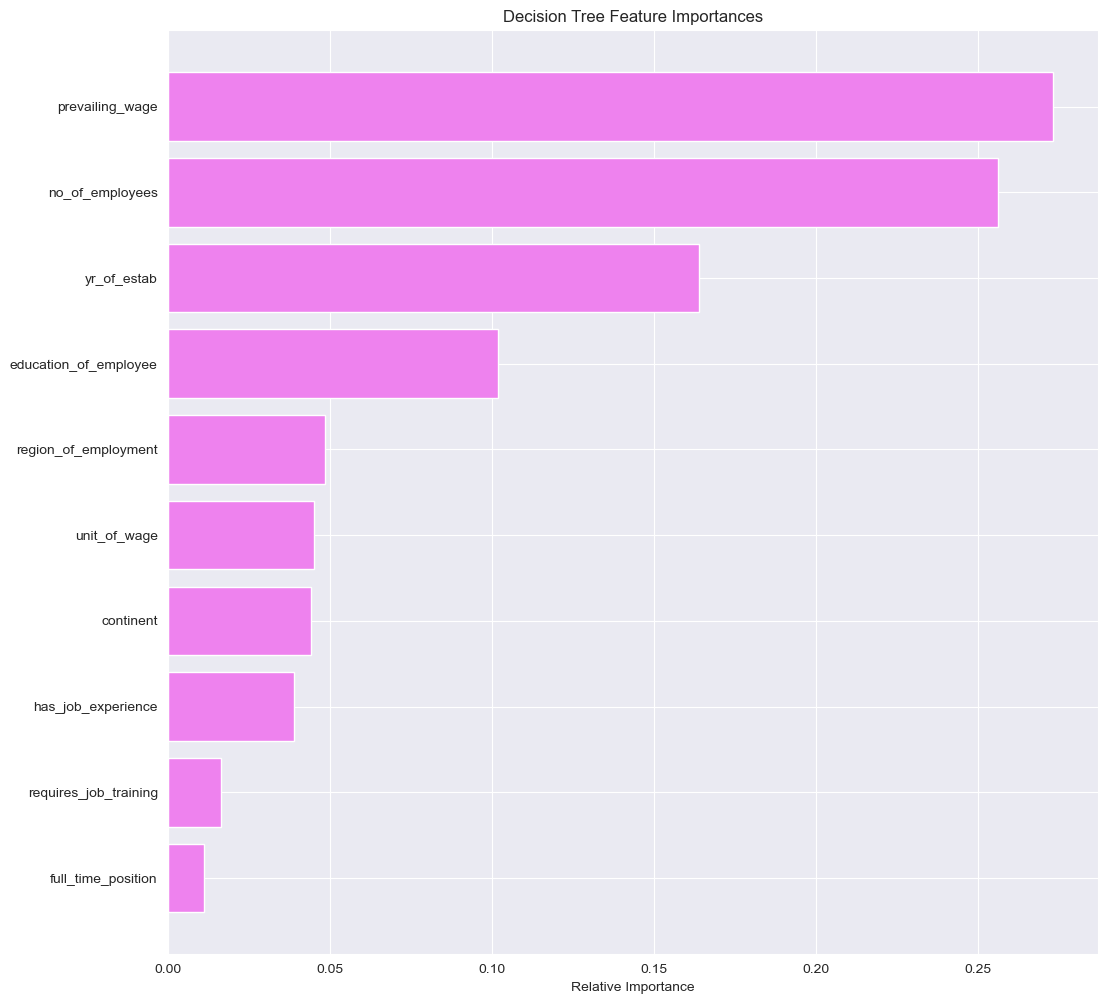

In [265]:
# determine important features
importances = dtree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Decision Tree Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* Prevailing_wages is the most important feature
* This model overfits the train data. All train data scores are 1.0 and the test data scores are 0.66 (accuracy), 0.50 (Recall), and 0.49 (Precision)

## Bagging Classifier

In [68]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [69]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9802646333258578
Accuracy on test set :  0.7189952904238619
Recall on training set :  0.9466486577747762
Recall on test set :  0.44899566758566367
Precision on training set :  0.9936204146730463
Precision on test set :  0.6034939121228163


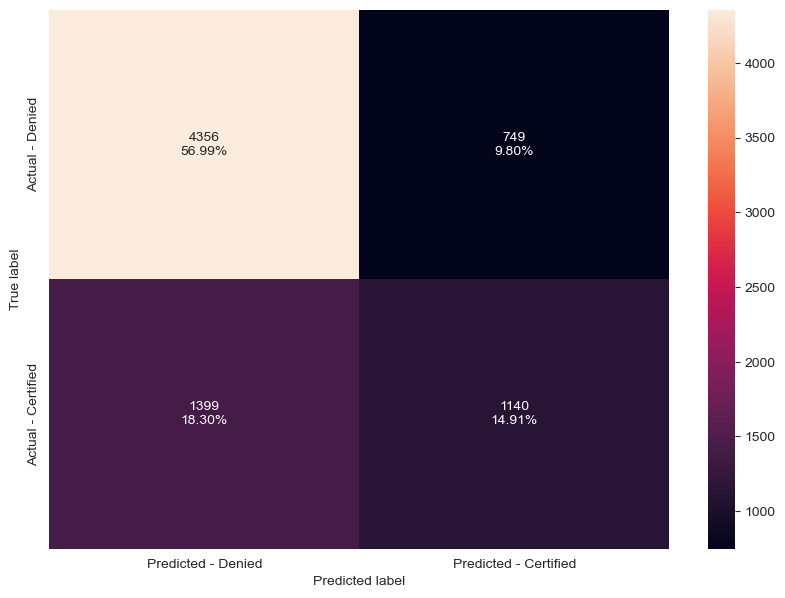

In [266]:
# make confusion matrix
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [71]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [72]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.7361329147043433
Recall on training set :  1.0
Recall on test set :  0.49389523434423
Precision on training set :  1.0
Precision on test set :  0.6314199395770392


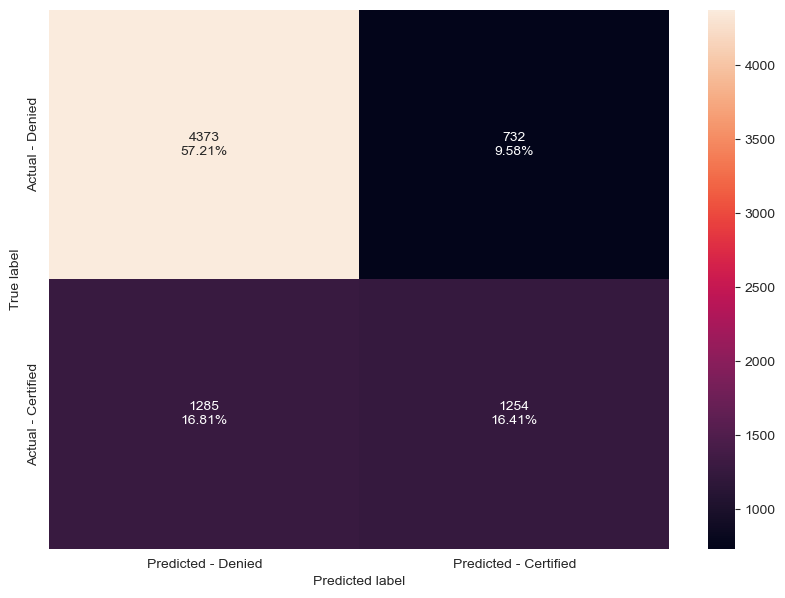

In [267]:
# make confusion matrix
make_confusion_matrix(rf_estimator,y_test)

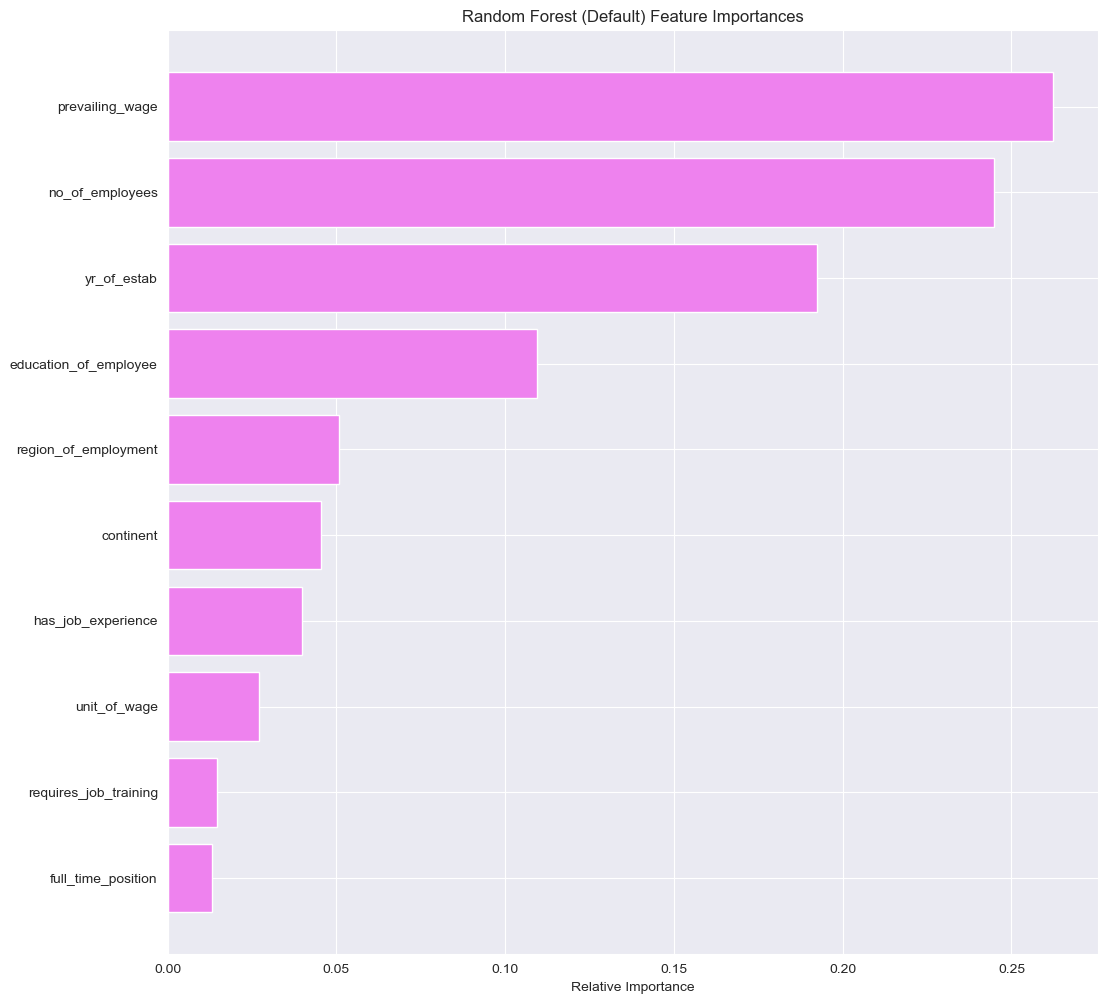

In [268]:
# show important features
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Random Forest (Default) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**


*   Both models are overfitting the train data
*   Random forest has slightly higher accuracy and precision scores, while bagging classifier has a slightly higher recall score



## Hypertuning

### Decision Tree

In [63]:
# Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,10)) + [None], 
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes' : [2, 10, 15] + [None],
              'min_impurity_decrease': [0.01, 0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=1)

In [64]:
#Using above defined function to get accuracy, recall and precision on train and test set
dtree_tuned_score=get_metrics_score(dtree_tuned)

Accuracy on training set :  0.7263399865440682
Accuracy on test set :  0.7350863422291993
Recall on training set :  0.3972648995441499
Recall on test set :  0.40015754233950374
Precision on training set :  0.6421943231441049
Precision on test set :  0.6693017127799736


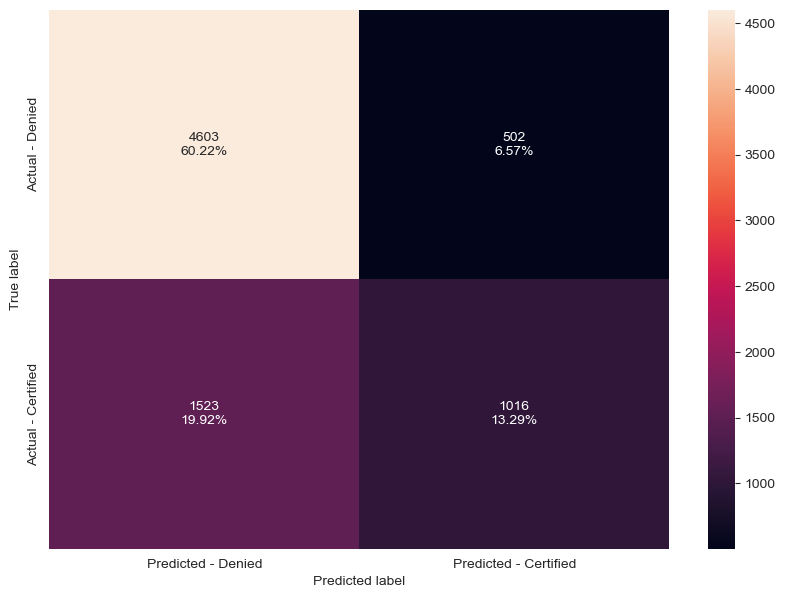

In [269]:
# make confusion matrix
make_confusion_matrix(dtree_tuned,y_test)

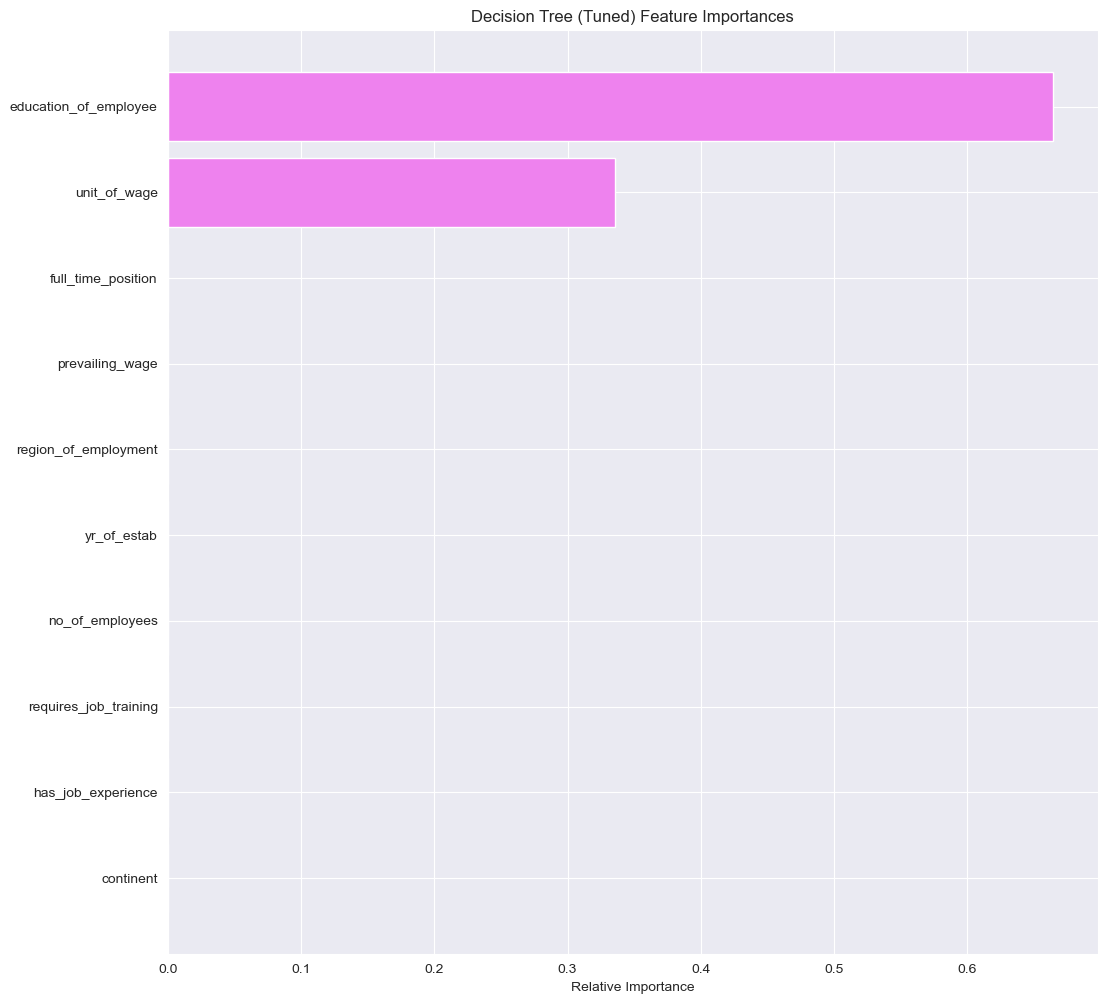

In [270]:
# show important features
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Decision Tree (Tuned) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
* Only two important factors: education_of_employee and unit_of_wage, respectively 
* Pretty good Accuracy and Precision scores, but the Recall score is suboptimal

### Bagging Classifier

In [75]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.9,1],
              'max_features': [0,7,0.9,1],
              'n_estimators' : [10,20,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=7, max_samples=1, random_state=1)

In [76]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.33208118412200044
Accuracy on test set :  0.33215593929879644
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  0.33208118412200044
Precision on test set :  0.33215593929879644


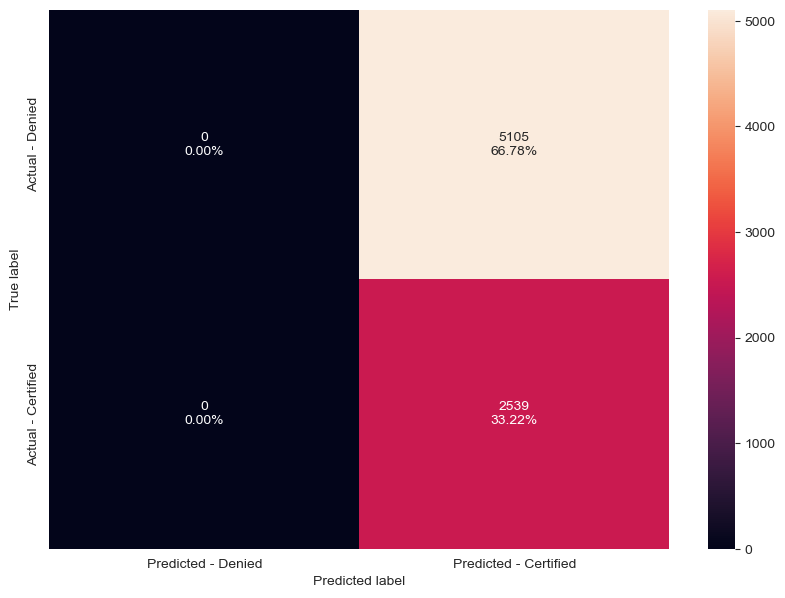

In [271]:
# make confusion matrix
make_confusion_matrix(bagging_estimator_tuned,y_test)

**Observations:**



*   The recall scores in both the train and test sets are both 1
*   The precision and accuracy scores for both the train and test sets are each 0.33
*   This model has 0 predicted Denied values and the Certified predictions are not great





### Logisitic Regression - Base Estimator

In [78]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [79]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.6679188158779995
Accuracy on test set :  0.6678440607012036
Recall on training set :  0.0
Recall on test set :  0.0
Precision on training set :  0.0
Precision on test set :  0.0


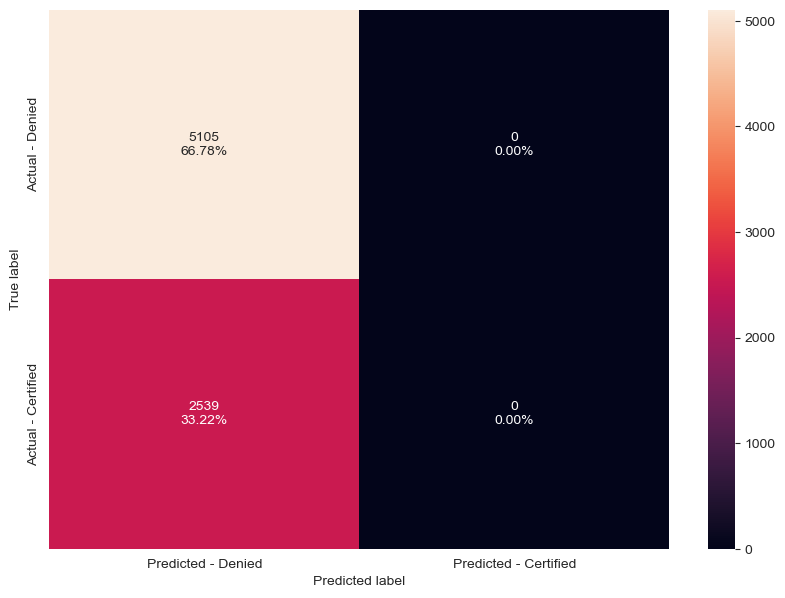

In [272]:
# make confusion matrix
make_confusion_matrix(bagging_lr,y_test)

**Observations:**


* This model seems to be the exact opposite of the Hypertuning Bagging Classifier Model
*   The training scores in both the train and test sets are both 0.66
*   The precision and accuracy scores for both the train and test sets are each 0.0
*   This model has 0 predicted Certified values and the Denied predictions are not great

### Random Forest Classifier

In [81]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.3, 0.1),
    "max_samples": np.arange(0.3, 0.4, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.2, max_samples=0.4, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [82]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.7798273155416012
Accuracy on test set :  0.7460753532182104
Recall on training set :  0.5098767516461252
Recall on test set :  0.45687278456085073
Precision on training set :  0.7467853610286844
Precision on test set :  0.6736353077816493


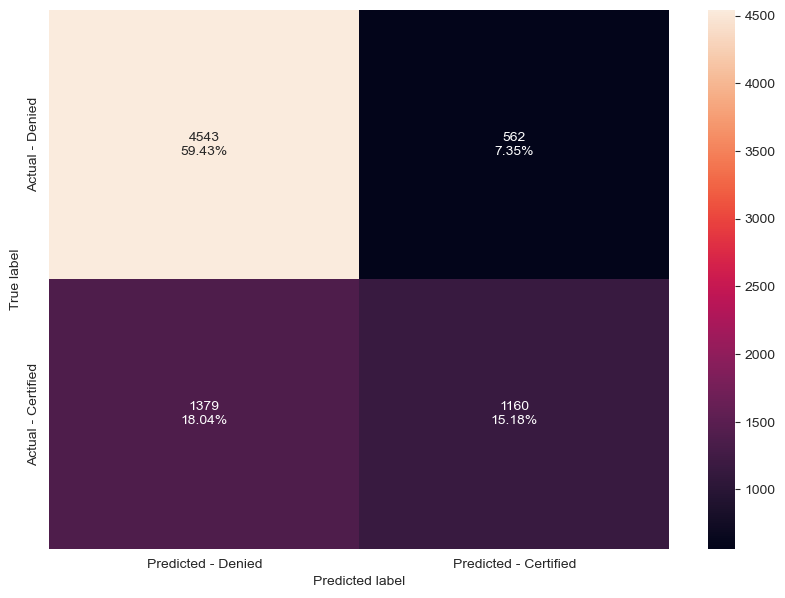

In [273]:
# make confusion matrix
make_confusion_matrix(rf_estimator_tuned,y_test)

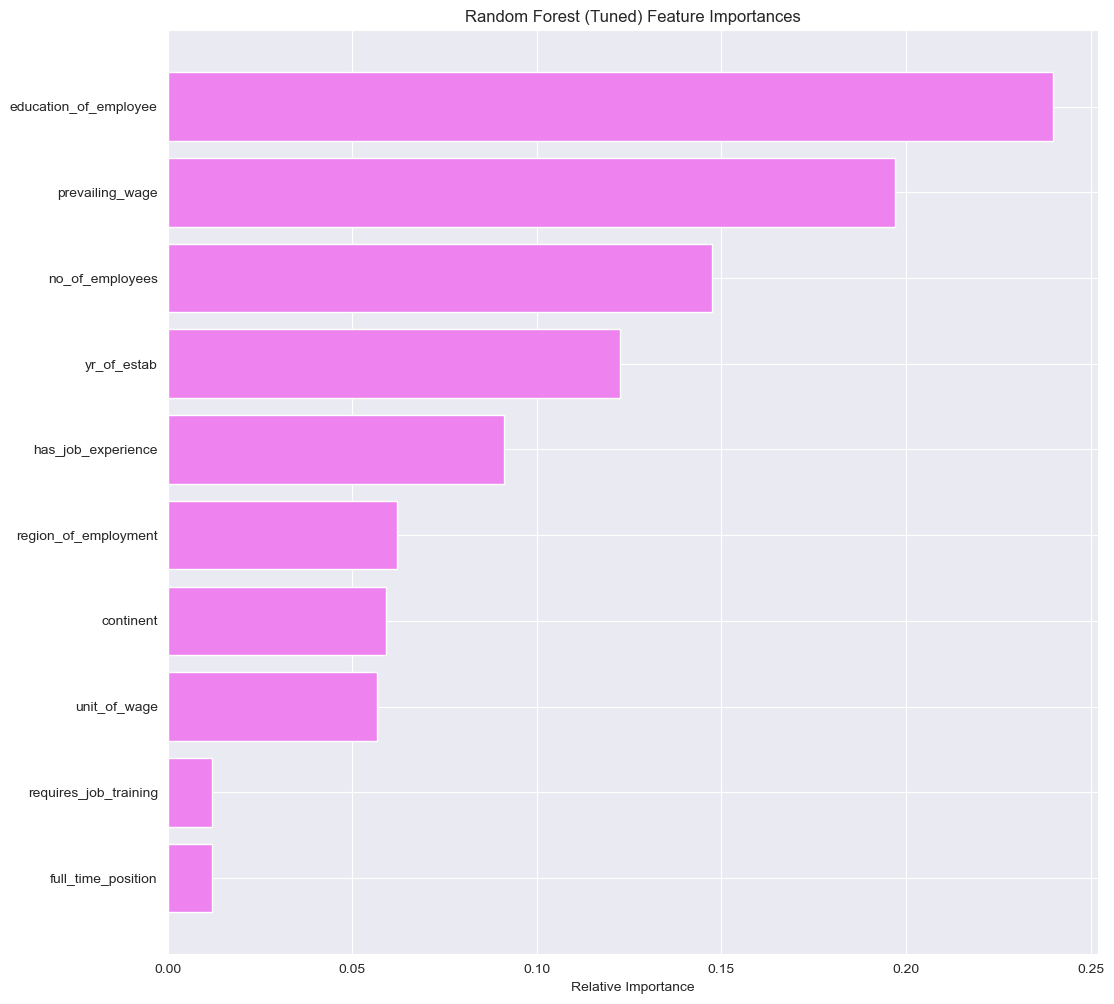

In [274]:
# show important features
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Random Forest (Tuned) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**



*   All of the scores could be improved for the train and test sets, but the train and test sets have pretty similar scores and none of them are all that bad





### Random Forest- Weighted

In [275]:
# determine shape of dataframe
df.shape

(25480, 11)

In [276]:
# determine value counts for case_status
df.case_status.value_counts()

0    17018
1     8462
Name: case_status, dtype: int64

In [278]:
# print the class weight values
print ('Certified(0): ', round(1- (17018/25480), 2))
print ('Denied(1): ', round(1-(8462/25480), 2))

Certified(0):  0.33
Denied(1):  0.67


In [88]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.33, 1: 0.67}],
    "n_estimators": [100,150],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.3, 0.1),
    "max_samples": np.arange(0.3, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67}, max_features=0.2,
                       max_samples=0.3, min_samples_leaf=9, random_state=1)

In [153]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.7474209464005382
Accuracy on test set :  0.7305075876504448
Recall on training set :  0.6809049468174911
Recall on test set :  0.6474990153603781
Precision on training set :  0.6066486161251504
Precision on test set :  0.5852616589533642


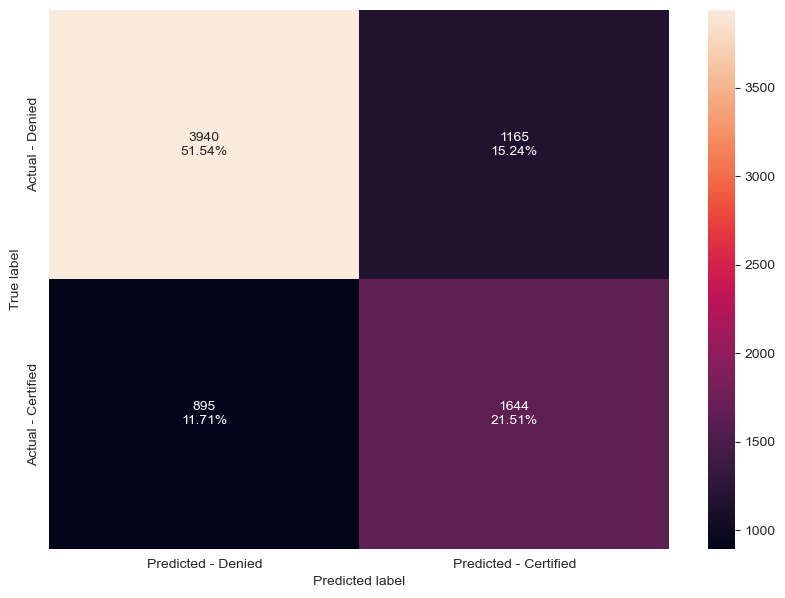

In [279]:
# make confusion matrix
make_confusion_matrix(rf_estimator_weighted,y_test)

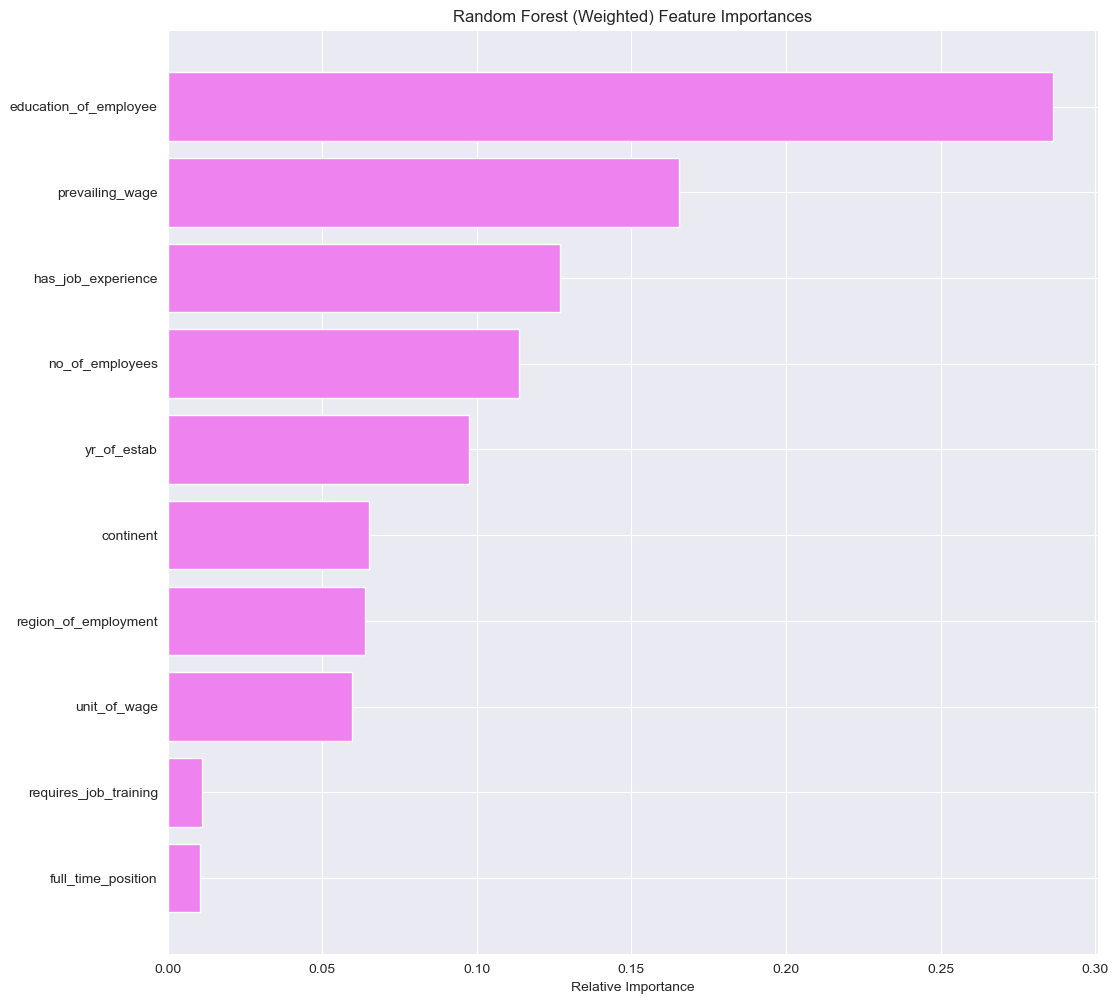

In [280]:
# show important features
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Random Forest (Weighted) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**


*   Similar to the Random Forest Classifier model, this model has decent scores all around and has values that are similar between the train and test sets
*   education_of_employee seems to have the highest importance out of the listed variables




### Comparing all models till now

In [282]:
# defining list of models
models = [dtree, dtree_tuned, bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [283]:
# create new dataframe
comparison_frame = pd.DataFrame({'Model':['Decision Tree with default parameters', 'Tuned Decision Tree','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with default parameters', 
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
BaggingFrame = comparison_frame
BaggingFrame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree with default parameters,1.00,0.66,1.00,0.50,1.00,0.49
1,Tuned Decision Tree,0.73,0.74,0.40,0.40,0.64,0.67
2,Bagging classifier with default parameters,0.98,0.72,0.95,0.45,0.99,0.60
3,Tuned Bagging Classifier,0.33,0.33,1.00,1.00,0.33,0.33
4,Bagging classifier with base_estimator=LR,0.67,0.67,0.00,0.00,0.00,0.00
5,Random Forest with default parameters,1.00,0.74,1.00,0.49,1.00,0.63
6,Tuned Random Forest Classifier,0.78,0.75,0.51,0.46,0.75,0.67
7,Random Forest with class_weights,0.75,0.73,0.68,0.65,0.61,0.59


**Observations:**

*   As was mentioned above, the two models that seemed to have performed the best were the Tuned Random Forest Classifier and the Random Forest with class_weights.
*   Between those two models, they had very similar accuracies, Random Forest with class_weights had higher recall scores, and Tuned Random Forest Classifier had higher precision scores



## Boosting

### ADABoost Classifier

In [94]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [95]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.7360955371159453
Accuracy on test set :  0.7340397697540555
Recall on training set :  0.4273172378862063
Recall on test set :  0.41788105553367466
Precision on training set :  0.6580863234529382
Precision on test set :  0.656559405940594


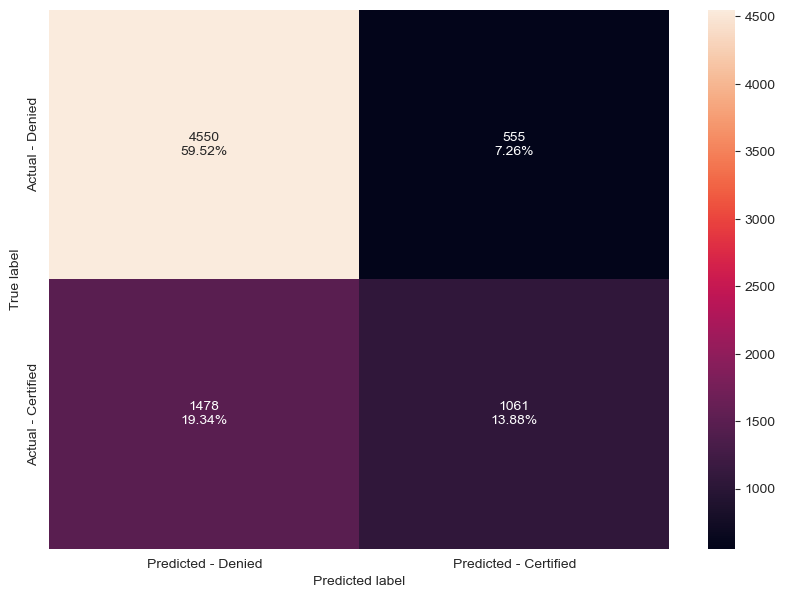

In [96]:
make_confusion_matrix(abc,y_test)

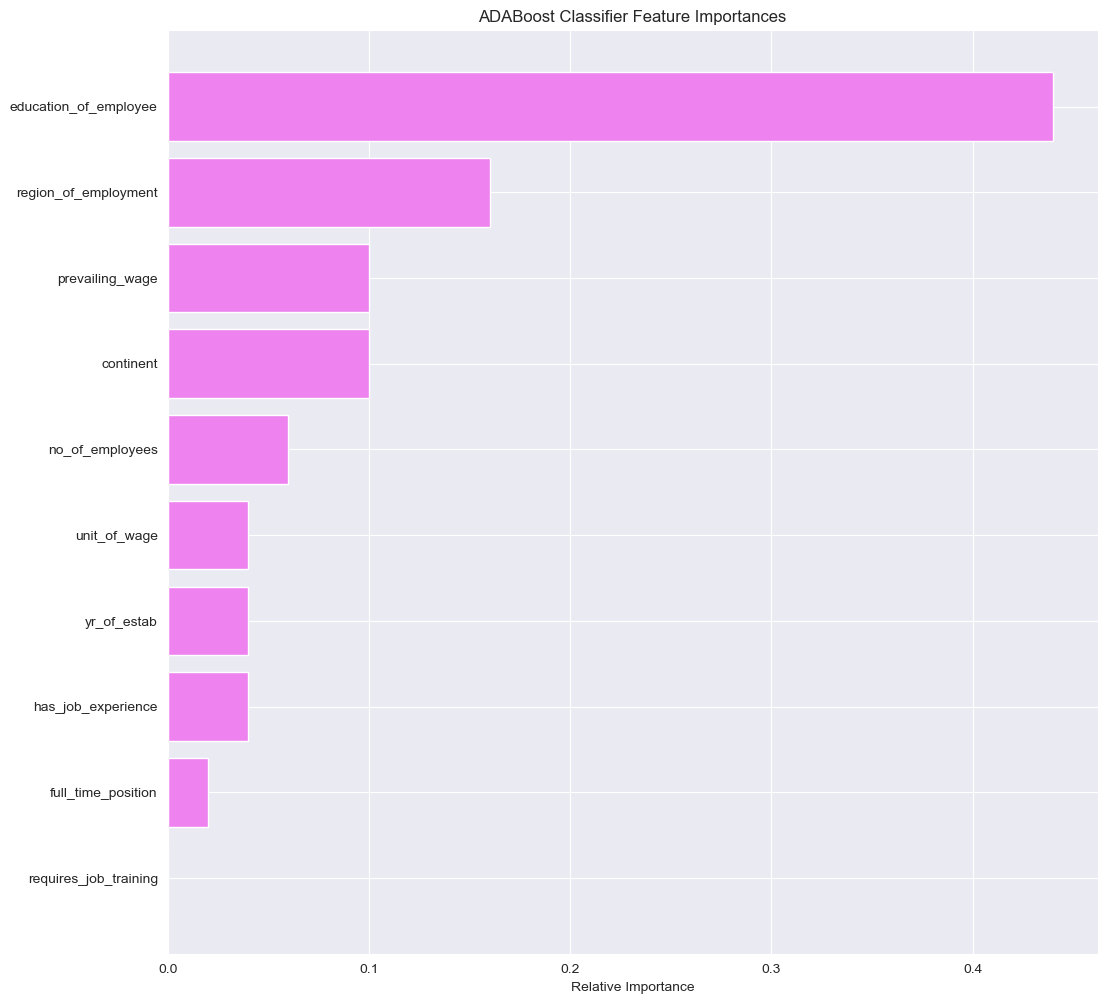

In [97]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('ADABoost Classifier Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classifier

In [98]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [99]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.7545413769903566
Accuracy on test set :  0.7517006802721088
Recall on training set :  0.5037987506331251
Recall on test set :  0.49625836943678614
Precision on training set :  0.6746552113949807
Precision on test set :  0.6705694518360831


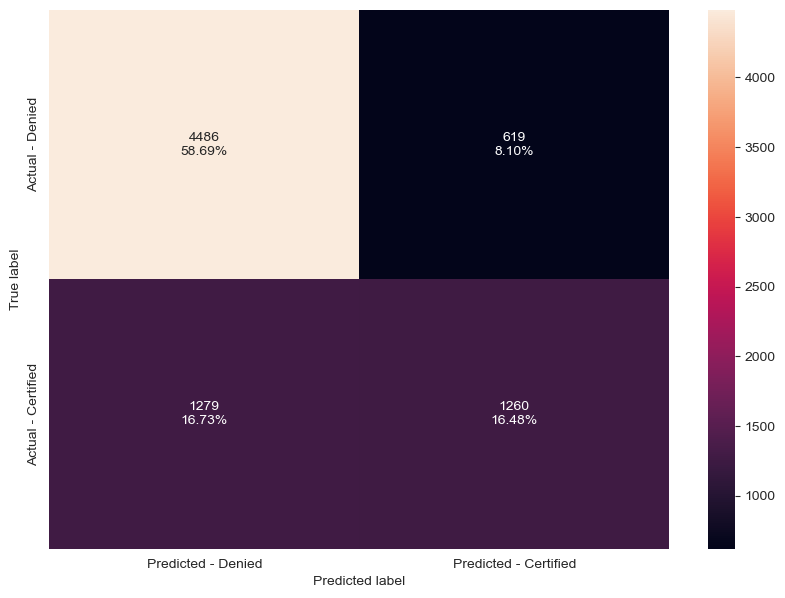

In [100]:
make_confusion_matrix(gbc,y_test)

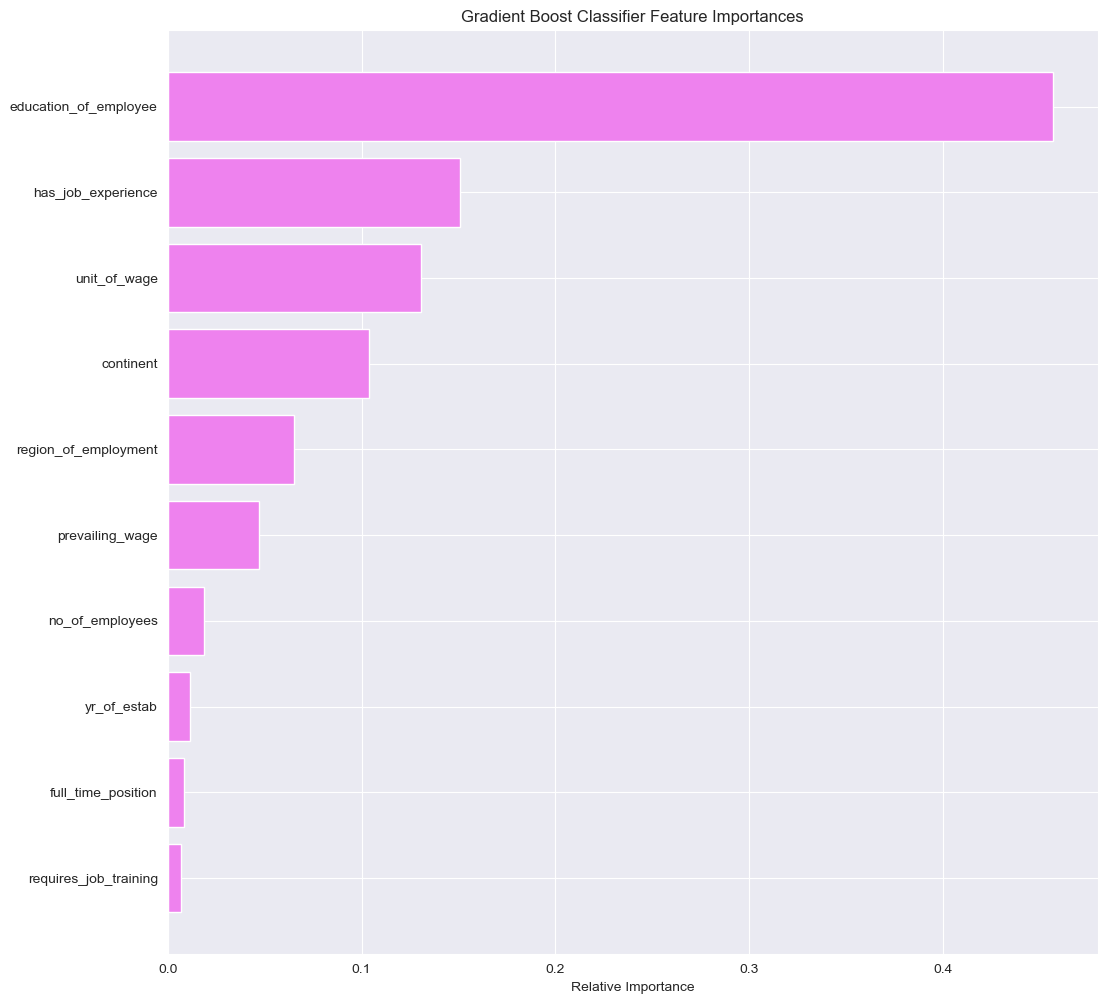

In [101]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Gradient Boost Classifier Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### XGBoost Classifier

In [102]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')#, enable_categorical = True)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [103]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.836846826642745
Accuracy on test set :  0.7370486656200942
Recall on training set :  0.6439304406550734
Recall on test set :  0.4840488381252462
Precision on training set :  0.8264355362946912
Precision on test set :  0.6371176775531363


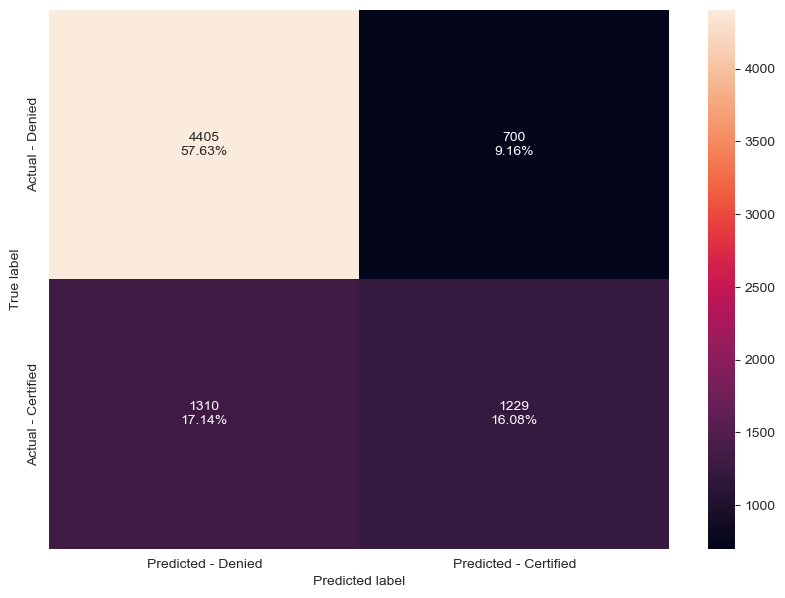

In [104]:
make_confusion_matrix(xgb,y_test)

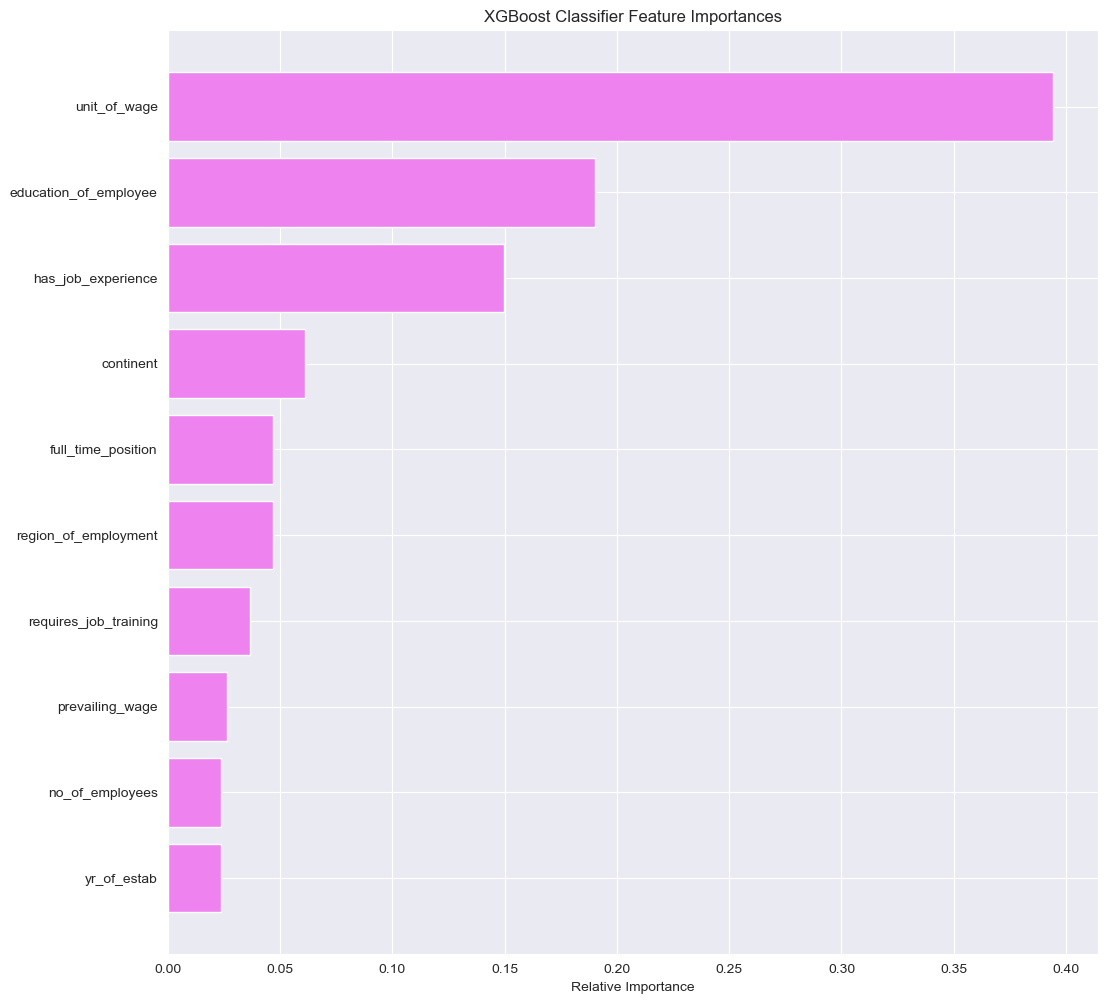

In [105]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('XGBoost Classifier Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

*   The XGBoost Classifier slightly overfit the train data set
*   All models had similar accuracy scores, with Gradient Boost Classifier having the highest
* All models had similarly low recall scores. XGBoost had the highest train recall score, but the test recall score was much lower
* All models had similar precision scores. XGBoost had the highest train precision score, but the test precision score was closer to the other model's precision scores



## Hyperparameter Tuning

### ADABoost Classifier

In [106]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,50,10),
    "learning_rate":np.arange(0.1,1.2,0.4)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.5, n_estimators=20, random_state=1)

In [107]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.75112132765194
Accuracy on test set :  0.7481684981684982
Recall on training set :  0.5053182508863752
Recall on test set :  0.4982276486805829
Precision on training set :  0.6648156374944469
Precision on test set :  0.6602296450939458


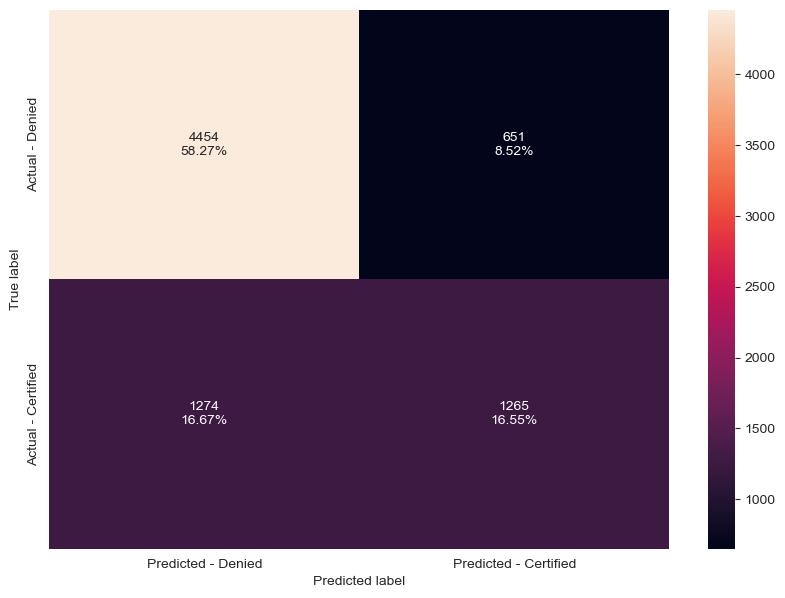

In [108]:
make_confusion_matrix(abc_tuned,y_test)

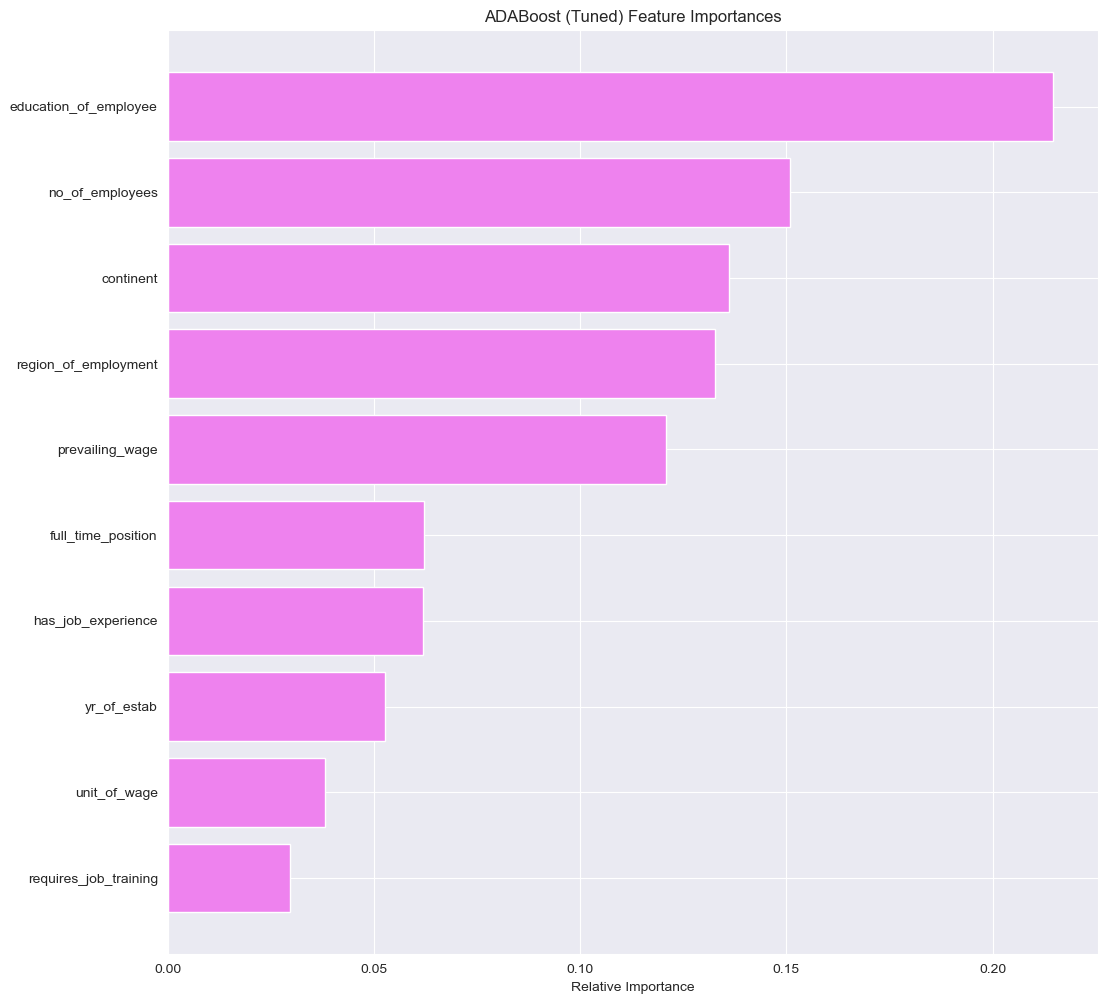

In [109]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('ADABoost (Tuned) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

*   This model does not overfit and has pretty good accuracy and precision scores. Recall score is pretty low.
*   education_of_employee is the most important factor



### Gradient Boosting Classifier

**ADABoost Classifier as the estimtor for initial predictions**

In [110]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [111]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.7552702399641175
Accuracy on test set :  0.7518315018315018
Recall on training set :  0.5063312510552085
Recall on test set :  0.49783379283182355
Precision on training set :  0.6754504504504505
Precision on test set :  0.6702014846235419


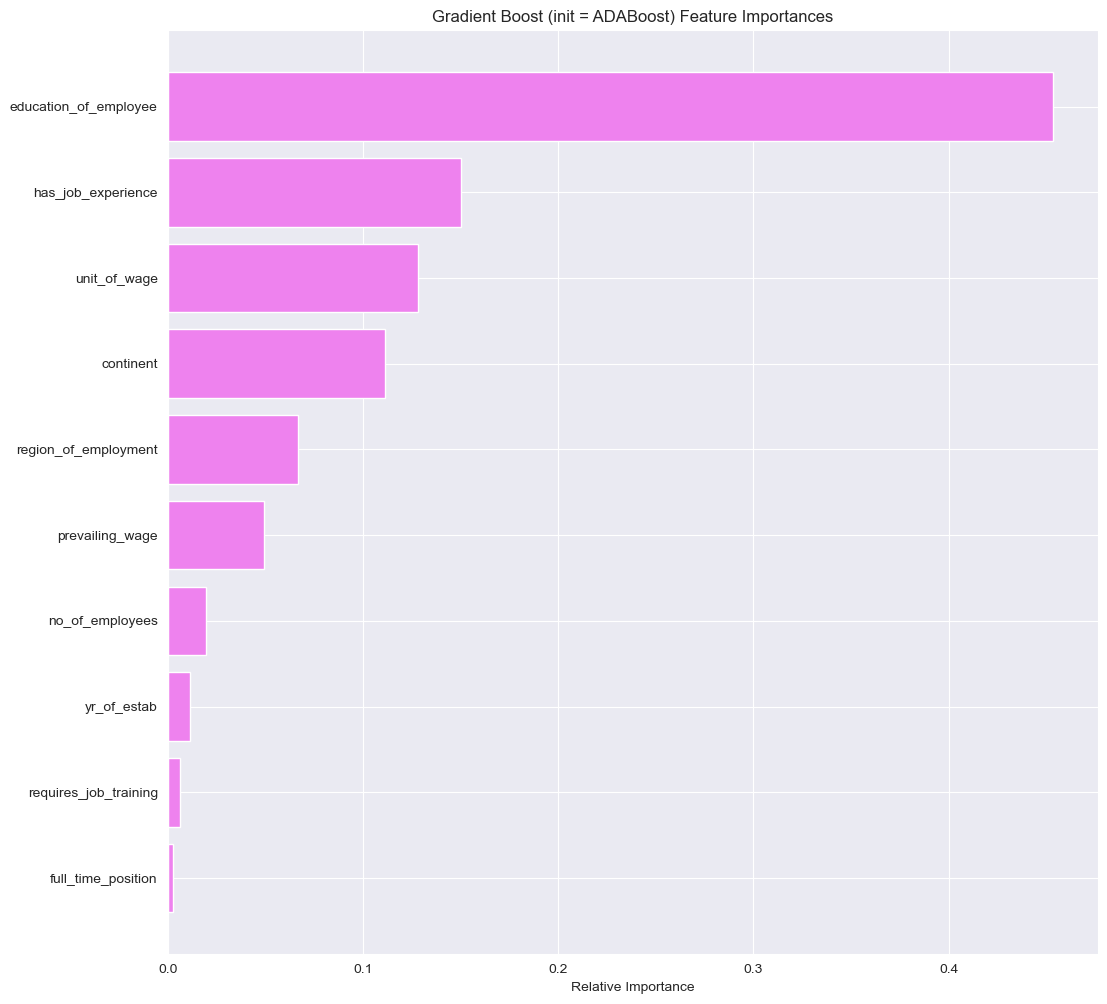

In [112]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Gradient Boost (init = ADABoost) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Default Parameters**

In [113]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150],
    "subsample":[0.9,1],
    "max_features":[0.7,0.8]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=150, random_state=1,
                           subsample=0.9)

In [114]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.7576250280331913
Accuracy on test set :  0.7505232862375719
Recall on training set :  0.5017727502954584
Recall on test set :  0.4879873966128397
Precision on training set :  0.6841620626151013
Precision on test set :  0.671180931744312


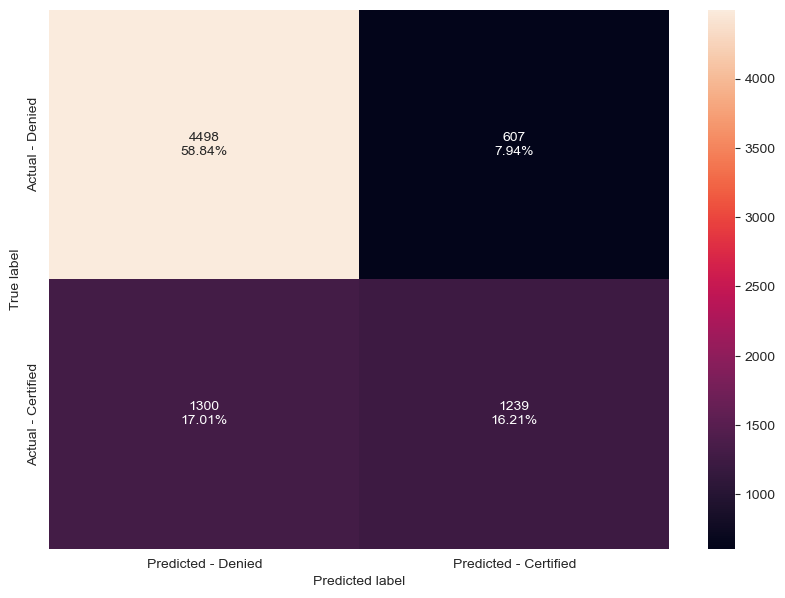

In [115]:
make_confusion_matrix(gbc_tuned,y_test)

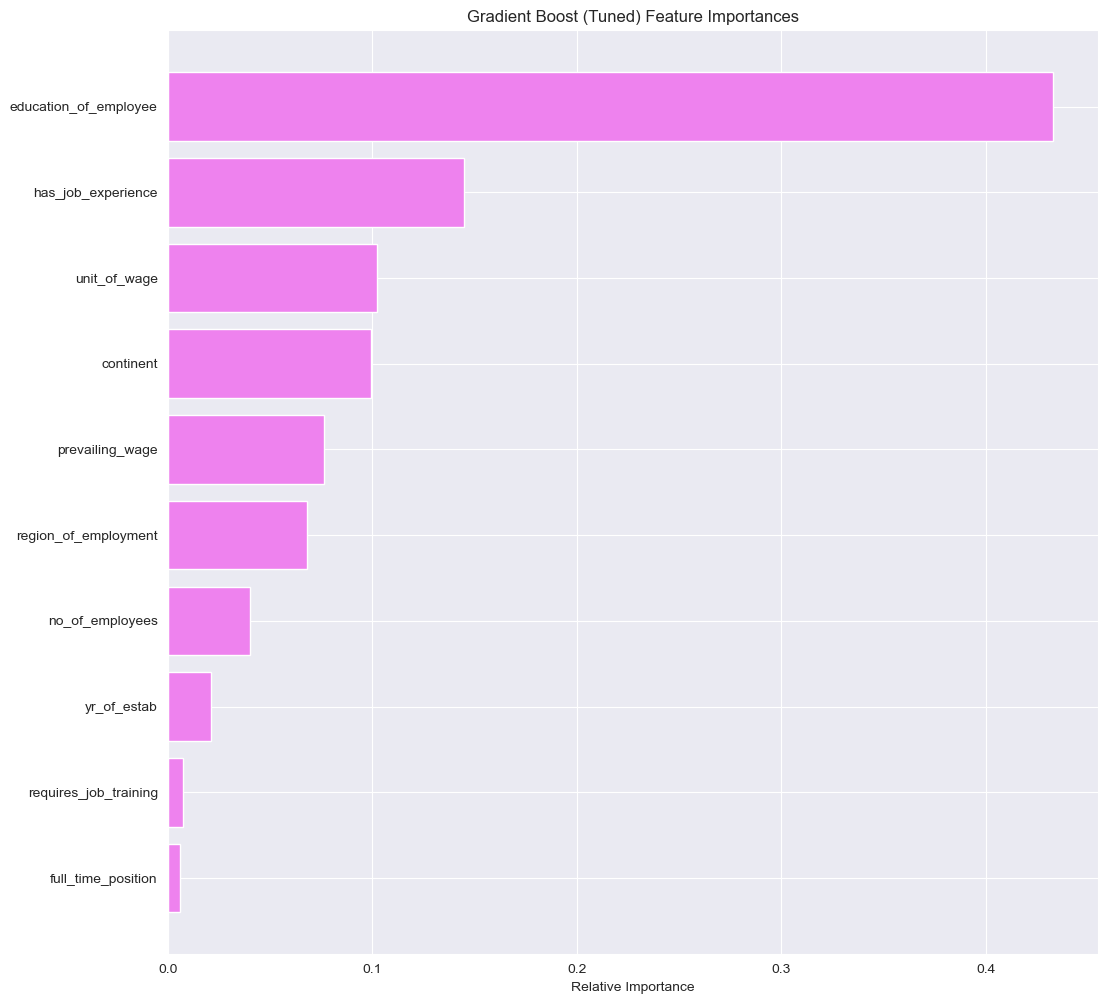

In [116]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Gradient Boost (Tuned) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

*   Like the previous model, this model has pretty good accuracy and precision scores, but a low recall score
* The default parameters performed slightly better than the ADABoost Classifier base estimator, but the difference was fairly insignificant
*   education_of_employee is the most important factor



### XGBoost Classifier

In [117]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,40,20),
    "scale_pos_weight":[0,1],
    "subsample":[0.9,1],
    "learning_rate":[0.2,0.05],
    "gamma":[0,1],
    "colsample_bytree":[0.5,0.7],
    "colsample_bylevel":[0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [118]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.7730993496299619
Accuracy on test set :  0.7527472527472527
Recall on training set :  0.5311497551916259
Recall on test set :  0.4986215045293423
Precision on training set :  0.7124094202898551
Precision on test set :  0.6723313860860329


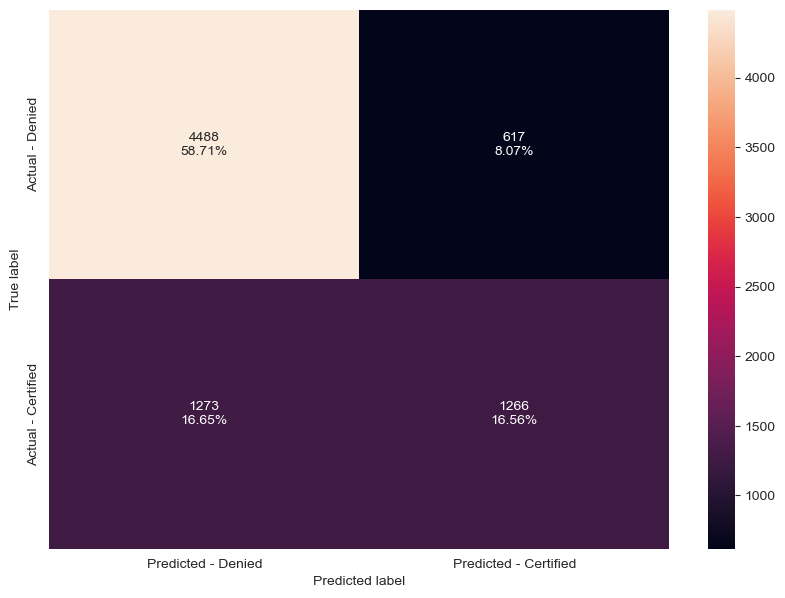

In [119]:
make_confusion_matrix(xgb_tuned,y_test)

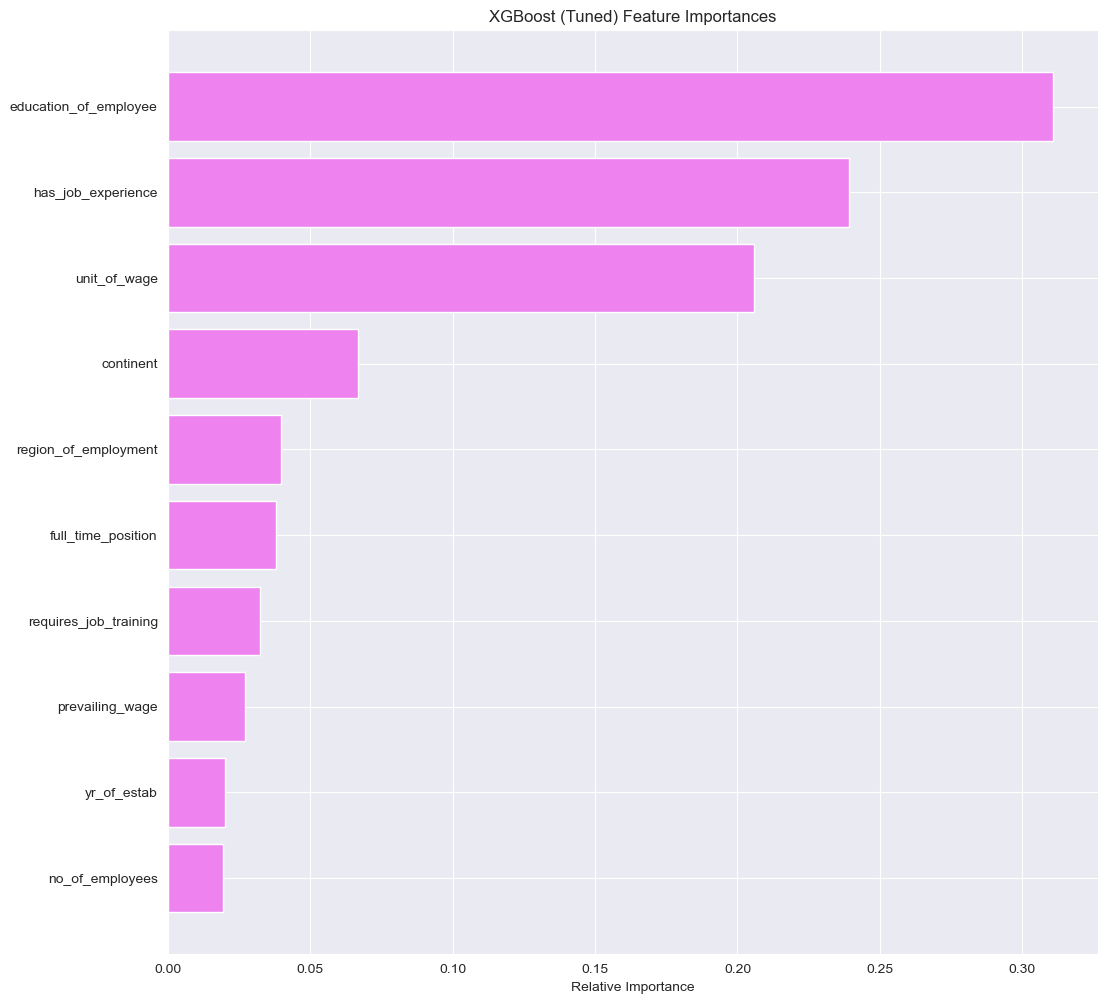

In [120]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('XGBoost (Tuned) Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**

*   Like the previous models, this model has pretty good accuracy and precision scores, with a lower recall score.
*   education_of_employee is the most important factor



### Stacking Model

In [177]:
estimators=[('Decision Tree', dtree_tuned), ('Bagging_Tuned', bagging_estimator_tuned),
            ('Random Forest', rf_estimator_weighted), 
           ('Gradient Boosting', gbc_tuned), ('AdaBoost', abc_tuned) 
           ]
final_estimator=XGBClassifier(random_state=1)

In [178]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.01,
                                                       random_state=1)),
                               ('Bagging_Tuned',
                                BaggingClassifier(max_features=7, max_samples=1,
                                                  random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_features=0.2,
                                                       max_samples=0.3,
                                                       min_samples_leaf=9,...
 

In [179]:
#Using above defined function to get accuracy, recall and precision on train and test set
stacking_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.7507849293563579
Accuracy on test set :  0.7429356357927787
Recall on training set :  0.508188418031403
Recall on test set :  0.4915320992516739
Precision on training set :  0.662703654777631
Precision on test set :  0.6493236212278877


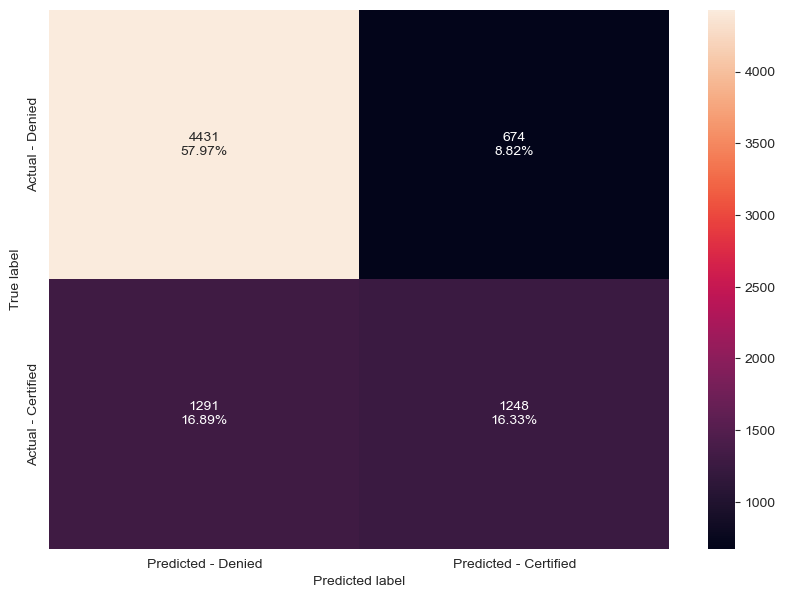

In [180]:
make_confusion_matrix(stacking_estimator,y_test)

**Observations:**

* Accuracy and Precision scores are not bad, but the Recall score is less than optimal

## Comparing All Models

In [181]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [182]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned', 'Stacking Model'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
BoostingFrame = comparison_frame
BoostingFrame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.74,0.73,0.43,0.42,0.66,0.66
1,AdaBoost Tuned,0.75,0.75,0.51,0.50,0.66,0.66
2,Gradient Boosting with default parameters,0.75,0.75,0.50,0.50,0.67,0.67
3,Gradient Boosting with init=AdaBoost,0.76,0.75,0.51,0.50,0.68,0.67
4,Gradient Boosting Tuned,0.76,0.75,0.50,0.49,0.68,0.67
5,XGBoost with default parameters,0.84,0.74,0.64,0.48,0.83,0.64
6,XGBoost Tuned,0.77,0.75,0.53,0.50,0.71,0.67
7,Stacking Model,0.75,0.74,0.51,0.49,0.66,0.65


**Observations:**


*   Many of the models were very similar, but the XGBoost Tuned model performed the best
* While maintaining similar values between the train and test sets, the XGBoost Tuned Model performed well in precision and accuracy. The recall score, while low, was higher than most of the other models' scores and was still relatively close between the train and test sets






##  Will tuning the hyperparameters improve the model performance?

* For the Decision Tree, the scores of the tuned model were much closer between the train and test sets. There was less overfitting compared the the default model
* For Bagging, tuning the model decreased the performance. The default model overfit the train set, but the tuned model had severely low accuracy and precision and a recall score of 1.0 for both the train and test sets
* For Random Forest, the tuned model performed better than the default model, and about the same as the weighted model. The tuned model fixed the overfitting that occured in the default model, and had a higher precision score, but lower recall score than the weighted model
* For ADABoost, the tuned model peformed slightly better on the recall score than with the default parameters, while the other scores remained fairly similar
* For Gradient Boost, the scores did not change much between boosting with default parameters, with init= ADABoost, and Tuned 
* For XGBoost, the accuracy scores were improved in between the train and test sets in the Tuned model vs the default parameters. The score of the Train accuracy fell, but it overfitted the train data set, which was fixed in the Tuned model. The same thing happened with both the Recall and Precision scores. The default training set overfit and the Tuned resolved the scores

## Model Performance Comparison and Conclusions

### Comparisons:

In [187]:
Important_Features = pd.DataFrame({'Model': ['Decision Tree with default parameters', 
                                            'Tuned Decision Tree',
                                             'Random Forest with default parameters',
                                            'Tuned Random Forest Classifier',
                                            'Random Forest with class_weights',
                                            'AdaBoost with default parameters',
                                            'AdaBoost Tuned', 
                                            'Gradient Boosting with default parameters',
                                            'Gradient Boosting with ini=AdaBoost',
                                            'Gradient Boost Tuned', 
                                            'XGBoost with default parameters',
                                            'XGBoost Tuned'], 
                                     '1st': ['prevailing_wage', 'education_of_employee',
                                            'prevailing_wage','education_of_employee',
                                            'education_of_employee','education_of_employee',
                                            'education_of_employee','education_of_employee',
                                            'education_of_employee','education_of_employee',
                                            'unit_of_wage','education_of_employee'],
                                     '2nd': ['no_of_employees', 'unit_of_wage', 
                                            'no_of_employees', 'prevailing_wage',
                                            'prevailing_wage', 'region_of_employement',
                                            'no_of_employees', 'has_job_experience',
                                            'has_job_experience', 'has_job_experience',
                                            'education_of_employee','has_job_experience'],
                                     '3rd': ['yr_of_estab', 'NaN',
                                            'yr_of_estab', 'no_of_employees',
                                            'has_job_experience', 'prevailing_wage',
                                            'continent', 'unit_of_wage',
                                            'unit_of_wage', 'unit_of_wage',
                                            'has_job_experience', 'unit_of_wage']})
Important_Features

,Model,1st,2nd,3rd
0,Decision Tree with default parameters,prevailing_wage,no_of_employees,yr_of_estab
1,Tuned Decision Tree,education_of_employee,unit_of_wage,NaN
2,Random Forest with default parameters,prevailing_wage,no_of_employees,yr_of_estab
3,Tuned Random Forest Classifier,education_of_employee,prevailing_wage,no_of_employees
4,Random Forest with class_weights,education_of_employee,prevailing_wage,has_job_experience
5,AdaBoost with default parameters,education_of_employee,region_of_employement,prevailing_wage
6,AdaBoost Tuned,education_of_employee,no_of_employees,continent
7,Gradient Boosting with default parameters,education_of_employee,has_job_experience,unit_of_wage
8,Gradient Boosting with ini=AdaBoost,education_of_employee,has_job_experience,unit_of_wage
9,Gradient Boost Tuned,education_of_employee,has_job_experience,unit_of_wage


In [188]:
Important_Features['1st'].value_counts()

education_of_employee    9
prevailing_wage          2
unit_of_wage             1
Name: 1st, dtype: int64

In [189]:
Important_Features['2nd'].value_counts()

has_job_experience       4
no_of_employees          3
prevailing_wage          2
unit_of_wage             1
region_of_employement    1
education_of_employee    1
Name: 2nd, dtype: int64

In [190]:
Important_Features['3rd'].value_counts()

unit_of_wage          4
yr_of_estab           2
has_job_experience    2
NaN                   1
no_of_employees       1
prevailing_wage       1
continent             1
Name: 3rd, dtype: int64

In [183]:
# defining list of models
models = [dtree, dtree_tuned, bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted,
          abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, stacking_estimator 
          ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [184]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree with default parameters', 'Tuned Decision Tree','Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with default parameters', 
                                         'Tuned Random Forest Classifier','Random Forest with class_weights',
                                          'AdaBoost with default parameters','AdaBoost Tuned',
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned', 'Stacking Model'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test})
AllModels = comparison_frame
AllModels

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree with default parameters,1.00,0.66,1.00,0.50,1.00,0.49
1,Tuned Decision Tree,0.73,0.74,0.40,0.40,0.64,0.67
2,Bagging classifier with default parameters,0.98,0.72,0.95,0.45,0.99,0.60
3,Tuned Bagging Classifier,0.33,0.33,1.00,1.00,0.33,0.33
4,Bagging classifier with base_estimator=LR,0.67,0.67,0.00,0.00,0.00,0.00
5,Random Forest with default parameters,1.00,0.74,1.00,0.49,1.00,0.63
6,Tuned Random Forest Classifier,0.78,0.75,0.51,0.46,0.75,0.67
7,Random Forest with class_weights,0.75,0.73,0.68,0.65,0.61,0.59
8,AdaBoost with default parameters,0.74,0.73,0.43,0.42,0.66,0.66
9,AdaBoost Tuned,0.75,0.75,0.51,0.50,0.66,0.66


### Conclusions:


* The Bagging and Random Forest models dealt a lot more with overfitting of the train data than the Boosting models 
* Scores from a couple of the Bagging models had some really poor scores, such as the Bagging Classifier with base_esitmator = LR, which had Recall and Precision scores of 0 in both the train and the test sets, and Tuned Bagging Classifier, which had Accuracy and Precision scores of 0.33 in both the train and test sets and Recall scores of 1 in the train and test sets 
* Tuned Random Forest Classifier and Random Forest with class_weights performed well compared to the rest of the Bagging and Random Forest models and performed similarly to many of the Boosting models
* Of the Boosting Models, AdaBoost with default parameters performed the worst, with lower Recall and Precision scores, although not by much
* XGBoost with default parameters performed well but overfit the train set
* The rest of the Boosting models performed similarly well to each other



## Actionable Insights and Recommendations

### Actionable Insights:

* education_of_employee was overwhelmingly the most important feature, followed by has_job_experience, prevailing_wage, and unit_of_wage
* There are two avenues that can be explored based on the needs of the OLFC:
 * If the OLFC wants a model that is more likely to identify all true positives, while risking also identifying false positives, then the best model would one with high recall
 * If the OLFC wants a model that is more likely to reject all true negatives, while risking also rejecting false negatives, then the best model would be on with high precision


### Recommendations:

* When seeking out suitable profiles, give more weight to profiles of applicants who have higher degrees - the higher the degree, the heigher the priority of the application
* After education, prioritize the applicant's years of experience. The more experience the applicant has in the field, the higher the priority of the applicaiton
* After experience, prioritize prevailing wage, giving more weight to higher prevailing wages because there is a significantly higher rate of applications being denied with prevailing wages that are close to 0 
* Lastly, prioritize the unit of wage that the employer offers. Prioritize yearly wages first and then monthly, weekly, and hourly 
* If the OLFC prefers a model that is more likely to identify all applications that will be certified, but is willing to risk also spending time on applications that will be denied, then it is recommended to use the Random Forest with class weights model. This model performs slightly lower in its precision score, but higher in its recall score.
* If the OLFC prefers a model that is more likley to reject all applications that will be denied, while risking the rejection of applications that would be certified, then it is recommended to use the Gradiant Boost init = AdaBoost model, which has a fairly average recall score, but a slightly higher precision score than other models 

